# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

# Explore Data

### Loading Company Data from Excel File Using Pandas

In [2]:
df=pd.read_excel("/kaggle/input/company/company_data.xlsx")

### Previewing the First Five Rows of the Company Dataset

In [3]:
df.head()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,7077,2017-09-13,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,117,2016-08-20,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,7018,2016-07-08,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,140,2018-08-11,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,491,2017-07-15,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China


### Getting the Dimensions of the Company Dataset (Rows, Columns)


In [4]:
df.shape

(15000, 17)

### Listing All Column Names in the Company Dataset

In [5]:
df.columns

Index(['Order ID', 'Order Date', 'Unit Cost', 'Price', 'Order Qty',
       'Cost of Sales', 'Sales', 'Profit', 'Channel', 'Promotion Name',
       'Product Name', 'Manufacturer', 'Product Sub Category',
       'Product Category', 'Region', 'City', 'Country'],
      dtype='object')

### Displaying Dataset Summary: Data Types & Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              15000 non-null  int64         
 1   Order Date            15000 non-null  datetime64[ns]
 2   Unit Cost             15000 non-null  float64       
 3   Price                 15000 non-null  float64       
 4   Order Qty             15000 non-null  int64         
 5   Cost of Sales         15000 non-null  float64       
 6   Sales                 15000 non-null  float64       
 7   Profit                15000 non-null  float64       
 8   Channel               15000 non-null  object        
 9   Promotion Name        15000 non-null  object        
 10  Product Name          15000 non-null  object        
 11  Manufacturer          15000 non-null  object        
 12  Product Sub Category  15000 non-null  object        
 13  Product Category

### Checking for Missing Values in the Company Dataset

In [7]:
df.isnull().sum()

Order ID                0
Order Date              0
Unit Cost               0
Price                   0
Order Qty               0
Cost of Sales           0
Sales                   0
Profit                  0
Channel                 0
Promotion Name          0
Product Name            0
Manufacturer            0
Product Sub Category    0
Product Category        0
Region                  0
City                    0
Country                 0
dtype: int64

### Checking for Duplicate Rows in the Company Dataset

In [8]:
df.duplicated().sum()

0

### Removing the 'Order ID' Column and Displaying Updated Data

In [9]:
df.drop(columns='Order ID',inplace=True)
df.head()

,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,2017-09-13,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,2016-08-20,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,2016-07-08,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,2018-08-11,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,2017-07-15,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China


### Converting 'Order Date' to Datetime Format and Extracting the Year

In [10]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year


### Generating a Heatmap to Visualize the Correlation Matrix of Numerical Features

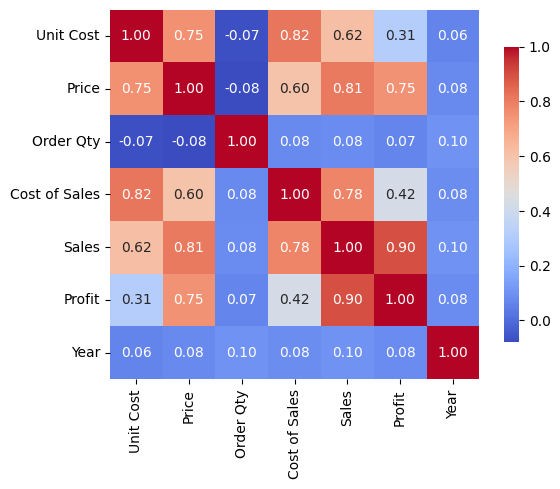

In [11]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

### Generating Summary Statistics for Numerical Columns in the Dataset


In [12]:
df.describe()

,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Year
count,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2017-09-29 02:00:23.040000,124.425132,296.514697,16.741733,1586.954833,3692.783986,2105.829152,2017.237000
min,2016-06-02 00:00:00,0.001576,0.950000,4.000000,0.015756,4.750000,-838.426733,2016.000000
25%,2016-12-24 00:00:00,16.847345,59.000000,9.000000,189.677420,645.000000,242.198732,2016.000000
50%,2017-08-17 00:00:00,69.688876,205.000000,10.000000,752.752320,2301.175750,1012.683637,2017.000000
75%,2018-06-18 00:00:00,164.348636,366.000000,13.000000,2006.030237,4767.720000,2573.128436,2018.000000
max,2019-06-02 00:00:00,1896.133845,2899.990000,1560.000000,42991.137192,78312.000000,55692.569522,2019.000000
std,NaN,163.569912,345.985232,43.490032,2408.961430,4917.886955,3387.145437,0.955663


# Data Analysis and Visualization

### Annual Order Trends: Yearly Order Volume Analysis

In [13]:
pio.renderers.default = 'iframe'
orders_per_year = df['Order Date'].dt.year.value_counts().sort_index()

orders_df = orders_per_year.reset_index()
orders_df.columns = ["Year", "Orders Count"]

fig = px.bar(
    orders_df, 
    x="Year", 
    y="Orders Count", 
    title="Number of Orders Per Year",
    text="Orders Count",  
    color="Orders Count",  
    color_continuous_scale="viridis", 
    width=900,  
    height=500  
)

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()


### Monthly Order Distribution: Insights into Sales Trends








In [14]:
orders_per_month = df['Order Date'].dt.month.value_counts().sort_index()

orders_df = orders_per_month.reset_index()
orders_df.columns = ["Month", "Orders Count"]

fig = px.pie(
    orders_df, 
    names="Month", 
    values="Orders Count", 
    title="Orders Per Month", 
    hole=0.3,  
    color_discrete_sequence=px.colors.sequential.Plasma  
)

fig.update_traces(textinfo="percent+label")  
fig.update_layout(height=500, width=500)

fig.show()


### Distribution of Sales Channels in the Dataset

In [15]:
cahnnel_count=df["Channel"].value_counts()
print(cahnnel_count)
print("-"*115)

cahnnel_count=px.bar(cahnnel_count,color=cahnnel_count)
cahnnel_count.show()

Channel
Store       9981
Online      2351
Reseller    1784
Catalog      884
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------


### Total Profit by Sales Channel

In [16]:
cahnnel_profit=df.groupby("Channel")["Profit"].sum().sort_values(ascending=False)
cahnnel_profit

Channel
Store       1.804928e+07
Online      6.529717e+06
Reseller    4.112546e+06
Catalog     2.895895e+06
Name: Profit, dtype: float64

### Visualizing Total Profit by Sales Channel

In [17]:
cahnnel_profit=px.bar(cahnnel_profit,color=cahnnel_profit,title="Total Profit by Sales Channel")
cahnnel_profit.show()

* 1️⃣ The Store channel is the most profitable, generating 18M+ in total profit, significantly higher than other channels.
* 2️⃣ Online sales are the second most profitable, with 6.5M in total profit, indicating strong digital performance.
* 3️⃣ Reseller and Catalog channels contribute the least, with 4.1M and 2.9M in profit, respectively.
* 4️⃣ The Store channel dominates in profitability, suggesting that in-person sales are a key revenue driver.
*  5️⃣ Improving the Online channel further through better marketing or promotions could help increase its profitability

### Average Sales Per Order by Sales Channel

In [18]:
cahnnel_sales=df.groupby("Channel")["Sales"].mean()
cahnnel_sales

Channel
Catalog     5656.438273
Online      4891.623699
Reseller    4019.402352
Store       3178.103120
Name: Sales, dtype: float64

*  1️⃣ The Store channel has the highest average sales per order, meaning customers tend to spend more per purchase in physical stores.
🔹 Actionable Insight: Invest in improving the in-store experience and personalized upselling strategies.

* 2️⃣ Online sales have moderate average sales per order, showing potential for growth.
🔹 Actionable Insight: Enhance digital marketing efforts, optimize the website, and introduce bundling offers to increase online sales per transaction.

* 3️⃣ Reseller and Catalog channels have the lowest average sales per order, indicating lower transaction values.
🔹 Actionable Insight: Offer incentives or discounts for bulk purchases in these channels to boost revenue.

* 4️⃣ Cross-checking with profit data is essential, as high sales do not always mean high profits.
🔹 Actionable Insight: Analyze profit margins per channel to prioritize the most profitable sales strategies.

In [19]:
cahnnel_sales=px.bar(cahnnel_sales,color=cahnnel_sales,title="Sales Distribution by Channel")
cahnnel_sales.show()


* 1️⃣ The Store channel has the highest average sales per order, meaning customers tend to spend more per purchase in physical stores. 🔹 Actionable Insight: Invest in improving the in-store experience and personalized upselling strategies.

* 2️⃣ Online sales have moderate average sales per order, showing potential for growth.

  🔹 Actionable Insight: Enhance digital marketing efforts, optimize the website, and introduce bundling offers to increase online sales per transaction.

* 3️⃣ Reseller and Catalog channels have the lowest average sales per order, indicating lower transaction values.

  🔹 Actionable Insight: Offer incentives or discounts for bulk purchases in these channels to boost revenue.

* 4️⃣ Cross-checking with profit data is essential, as high sales do not always mean high profits.

 🔹 Actionable Insight: Analyze profit margins per channel to prioritize the most profitable sales strategies.


### Order Distribution Across Regions

In [20]:
Region_counts=df["Region"].value_counts()
print(Region_counts)
print("-"*115)
Region_counts=px.bar(Region_counts,color=Region_counts)
Region_counts.show()

Region
North America    8869
Europe           3081
Asia             3050
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------


* 1️⃣ The region with the highest number of orders dominates the market, indicating strong demand and potential for further investment.
* 2️⃣ Regions with lower order counts may need targeted marketing efforts to boost sales.
* 3️⃣ Expanding logistics and distribution in high-performing regions could enhance delivery efficiency and customer satisfaction.
* 4️⃣ Analyzing regional demand trends helps in optimizing inventory allocation and ensuring the right products are available in the right locations.


### Sales Channel Distribution Across Regions

In [21]:
channel_region=pd.crosstab( df["Region"],df["Channel"])
channel_region

Channel,Catalog,Online,Reseller,Store
Region,,,,
Asia,0,758,615,1677
Europe,0,758,571,1752
North America,884,835,598,6552


In [22]:
channel_region = channel_region.reset_index().melt(id_vars="Region", var_name="Channel", value_name="Sales")
fig = px.bar(
    channel_region,
    x='Region',           
    y='Sales',            
    color='Channel',     
    title="Distribution of Sales Channels Across Regions",
    labels={'Sales': 'Total Sales', 'Region': 'Region'},  
    barmode='group',    
    height=500,         
    width=800           
)

fig.update_layout(
    xaxis_tickangle=-45,      
    plot_bgcolor='white',    
    font=dict(family='Arial'),  
    hoverlabel=dict(           
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

fig.update_traces(
    texttemplate='%{y}',    
    textposition='outside'  
)

fig.show()


* 1️⃣ Some regions rely heavily on specific sales channels, showing variations in customer purchasing behavior.

  🔹 Actionable Insight: Tailor marketing strategies per region—focus on online advertising in regions with low digital sales and enhance in-store promotions where physical sales dominate.

* 2️⃣ Regions with strong in-store sales but weak online sales represent a digital growth opportunity.

  🔹 Actionable Insight: Invest in localized online campaigns, improve delivery options, and introduce regionalized discounts to boost e-commerce adoption.

* 3️⃣ Reseller and catalog-based sales are strong in certain areas, suggesting a preference for bulk or business-oriented purchases.

   🔹 Actionable Insight: Strengthen partnerships with resellers, offer bulk order incentives, and optimize supply chain logistics for these high-performing regions.

* 4️⃣ Balancing channel distribution across regions can enhance profitability and operational efficiency.

   🔹 Actionable Insight: Use data-driven inventory management to allocate stock efficiently across regions and channels, reducing costs and maximizing sales potential.

### Sales Performance by Channel and Region

In [23]:
channel_region = df.groupby(["Channel", "Region"])["Sales"].sum().reset_index()

fig = px.bar(channel_region, x="Region", y="Sales", color="Channel", title="Sales by Channel and Region")
fig.show()

* 1️⃣ Some regions contribute significantly more to total sales, indicating strong demand in specific areas.

    🔹 Actionable Insight: Focus marketing and distribution efforts in high-performing regions to maximize sales impact.

* 2️⃣ Certain sales channels dominate in specific regions, showing customer preferences based on location.

    🔹 Actionable Insight: Enhance the presence of underperforming channels in regions where they have lower market share, such as promoting online sales in regions where physical stores dominate.

* 3️⃣ Online sales may vary significantly by region, highlighting digital adoption differences.

    🔹 Actionable Insight: Optimize e-commerce strategies, such as localized advertising, faster delivery options, or exclusive regional online promotions.

* 4️⃣ Regions with lower sales across all channels indicate untapped potential.

    🔹 Actionable Insight: Conduct market research to understand barriers and implement region-specific promotions or partnerships to drive engagement.

### Top Sales Channel Per Year

In [24]:

sales_per_channel = df.groupby(["Year", "Channel"])["Sales"].sum().reset_index()

top_channel_per_year = sales_per_channel.loc[sales_per_channel.groupby("Year")["Sales"].idxmax()]


top_channel_per_year=top_channel_per_year.sort_values(by="Sales", ascending=False)
top_channel_per_year

,Year,Channel,Sales
7,2017,Store,1.073805e+07
11,2018,Store,9.568865e+06
3,2016,Store,7.412802e+06
15,2019,Store,4.000930e+06


* 1️⃣ Certain sales channels consistently generate the highest revenue each year, showing their dominance in the market.

    🔹 Actionable Insight: Invest more resources into these high-performing channels to sustain and expand their market share.

* 2️⃣ Sales trends indicate shifts in consumer behavior over time, with some channels gaining or losing dominance.

    🔹 Actionable Insight: Monitor yearly trends to anticipate changes in customer preferences and adapt strategies accordingly.

* 3️⃣ Emerging channels in specific years may indicate growth potential, suggesting changing shopping habits.

    🔹 Actionable Insight: Strengthen marketing efforts and infrastructure for growing channels to maximize their potential.

* 4️⃣ If online sales are increasing over time, this signals a need for better digital customer experiences.

    🔹Actionable Insight: Optimize e-commerce platforms, improve logistics, and enhance digital marketing strategies.

### Unique Products in the Dataset

In [25]:
df["Product Name"].unique()

array(['Contoso SLR Camera M143 Grey',
       'Contoso 512MB MP3 Player E51 Blue',
       'Contoso DVD 9-Inch Player Portable M300 Silver', ...,
       'Contoso Rechargeable Battery Pack E310 Black',
       'Contoso 4-Line Corded Cordless Telephone M203 Grey',
       'Contoso 16GB Mp5 Player M1600 Red'], dtype=object)

### Top-Selling Product

In [26]:
df[["Product Name","Sales"]][df["Sales"]==df["Sales"].max()]

,Product Name,Sales
9853,Fabrikam Independent Filmmaker 1/3'' 8.5mm X20...,78312.0


* 1️⃣ Identifying the highest-selling product helps in understanding customer preferences and demand.

     🔹 Actionable Insight: Focus marketing campaigns on this product to maximize revenue and further increase sales.

* 2️⃣ If the top-selling product belongs to a specific category, similar products may have high potential.

     🔹 Actionable Insight: Expand product lines related to the best-seller to capitalize on its success.

* 3️⃣ Analyzing the sales channel of this product can reveal the most effective sales strategy.

     🔹 Actionable Insight: Strengthen the distribution and promotional efforts in the channels where this product performs best.

* 4️⃣ If seasonal trends influence sales, adjusting stock levels accordingly can prevent shortages.

     🔹 Actionable Insight: Use historical sales data to forecast demand and optimize inventory planning

### Lowest-Selling Product

In [27]:
df[["Product Name","Sales"]][df["Sales"]==df["Sales"].min()]

,Product Name,Sales
1247,SV USB Data Cable E600 Black,4.75


* 1️⃣ Identifying the lowest-selling product helps in recognizing underperforming items.

     🔹 Actionable Insight: Investigate potential reasons for low sales, such as pricing, lack of marketing, or customer demand.

* 2️⃣ If the product is not appealing to customers, consider rebranding, repositioning, or discontinuation.

     🔹 Actionable Insight: Conduct customer feedback surveys to understand the lack of interest and make necessary improvements.



### Top 10 Products by Average Sales

In [28]:
ProductName_avg_sales=df.groupby("Product Name")["Sales"].mean().sort_values(ascending=False)
ProductName_avg_sales.head(10)

Product Name
Adventure Works 52" LCD HDTV X590 White                  33349.885000
WWI Projector 1080p DLP86 Silver                         31768.537500
Contoso Projector 1080p X980 White                       30761.826923
Proseware Projector 1080p LCD86 White                    29826.803571
Proseware Projector 1080p DLP86 Black                    29261.018182
Proseware Projector 1080p DLP86 White                    28504.218750
Fabrikam Independent Filmmaker 1/3'' 8.5mm X200 Black    27092.000000
Contoso Projector 1080p X980 Black                       26183.250000
Proseware Projector 1080p LCD86 Black                    25754.817857
Contoso Projector 1080p X980 Silver                      25632.281250
Name: Sales, dtype: float64

In [29]:
ProductName_avg_sales=ProductName_avg_sales.head(10)
ProductName_avg_sales=px.bar(ProductName_avg_sales,color=ProductName_avg_sales,title="Top 10 Best-Selling Products Based on Average Sales")
ProductName_avg_sales.show()

* 1️⃣ The highest average sales products indicate strong customer demand and consistent performance.

    🔹 Actionable Insight: Prioritize inventory management and marketing efforts for these top-performing products to maximize profitability.

* 2️⃣ If certain product categories dominate the top 10, they represent a key revenue stream.

    🔹 Actionable Insight: Expand product lines within these high-performing categories to capture more market share.


### Top 10 Products by Total Ordered Quantity

In [30]:
ProductName_sum_Order_Qty=df.groupby("Product Name")["Order Qty"].sum().sort_values(ascending=False)
top_ProductName_sum_Order_Qty=ProductName_sum_Order_Qty.head(10)
top_ProductName_sum_Order_Qty

Product Name
Contoso In-Line Coupler E180 Silver                                            6780
Headphone Adapter for Contoso Phone E130 Silver                                4680
Contoso Rubberized Snap-On Cover Hard Case Cell Phone Protector E160 Silver    4580
Contoso In-Line Coupler E180 White                                             4060
Contoso Rubberized Skin BlackBerry E100 Silver                                 3560
Cigarette Lighter Adapter for Contoso Phones E110 White                        3520
Contoso Rubberized Snap-On Cover Hard Case Cell Phone Protector E160 Pink      3280
Contoso Touch Stylus Pen E150 Black                                            3060
Cigarette Lighter Adapter for Contoso Phones E110 Red                          2900
Contoso Original K1m Li-Ion Standard Battery E170 Black                        2860
Name: Order Qty, dtype: int64

In [31]:
ProductName_sum_Order_Qty=ProductName_sum_Order_Qty.head(10)
top_ProductName_sum_Order_Qty=px.bar(top_ProductName_sum_Order_Qty,color=top_ProductName_sum_Order_Qty,title="Top 10 Products by Total Ordered Quantity")
top_ProductName_sum_Order_Qty.show()

* 1️⃣ These products have the highest total order quantities, indicating strong demand and popularity.

     🔹 Actionable Insight: Ensure adequate stock levels and efficient supply chain management to prevent stockouts.

* 2️⃣ If specific categories dominate the top 10, they represent a major revenue driver.

     🔹 Actionable Insight: Expand product lines within these categories to capitalize on market demand.

* 3️⃣ High order quantities might indicate bulk purchasing trends.

     🔹 Actionable Insight: Offer bulk discounts or bundle deals to encourage larger purchases and customer retention.


### Most Expensive Products in the Dataset

In [32]:
df[["Product Name","Price"]][df["Price"]==df["Price"].max()].head()

,Product Name,Price
408,"Adventure Works 52"" LCD HDTV X590 Silver",2899.99
410,"Adventure Works 52"" LCD HDTV X590 White",2899.99
2057,"Adventure Works 52"" LCD HDTV X590 White",2899.99
2322,"Adventure Works 52"" LCD HDTV X590 Black",2899.99
3066,"Adventure Works 52"" LCD HDTV X590 White",2899.99


* 1️⃣ These products have the highest prices, indicating a premium offering.

     🔹 Actionable Insight: Highlight their unique features and value proposition through premium branding and targeted marketing campaigns.

* 2️⃣ High-priced products may have lower sales volumes compared to lower-priced alternatives.

     🔹 Actionable Insight: Consider offering flexible payment options, discounts, or bundling strategies to attract more buyers.

* 3️⃣ If these products have high margins, they can be leveraged to boost overall profitability.

     🔹 Actionable Insight: Prioritize them in upselling and cross-selling strategies to maximize revenue.


### Least Expensive Products in the Dataset

In [33]:
df[["Product Name","Price"]][df["Price"]==df["Price"].min()].head() 

,Product Name,Price
446,SV USB Data Cable E600 Pink,0.95
447,SV USB Data Cable E600 Pink,0.95
1246,SV USB Data Cable E600 Black,0.95
1247,SV USB Data Cable E600 Black,0.95
1705,SV USB Data Cable E600 Silver,0.95


* 1️⃣ These products have the lowest prices, which may drive high sales volumes but lower profit margins.

    🔹 Actionable Insight: Analyze whether increasing the price slightly could improve profitability without significantly affecting demand.

* 2️⃣ Low-priced products can serve as entry-level options to attract new customers.

    🔹 Actionable Insight: Use them in promotional campaigns or bundle them with higher-margin products to increase overall revenue.


### Most Profitable Product in the Dataset

In [34]:
df[["Product Name","Profit"]][df["Profit"]==df["Profit"].max()]

,Product Name,Profit
9853,Fabrikam Independent Filmmaker 1/3'' 8.5mm X20...,55692.569522


* 1️⃣ This product generates the highest profit, making it a key revenue driver for the company.

     🔹 Actionable Insight: Prioritize its marketing, ensure high visibility across sales channels, and maintain optimal stock levels.

* 2️⃣ High profitability could be due to high sales volume, high margins, or both.

     🔹 Actionable Insight: Analyze whether increasing production or expanding distribution can further maximize profits.


### Least Profitable Product in the Dataset

In [35]:
df[["Product Name","Profit"]][df["Profit"]==df["Profit"].min()]

,Product Name,Profit
10740,WWI Projector 480p DLP12 Black,-838.426733


* 1️⃣ This product generates the lowest profit, which may indicate high costs, low pricing, or poor demand.

    🔹 Actionable Insight: Perform a cost analysis to determine if production, logistics, or pricing adjustments can improve profitability.

* 2️⃣ If sales volume is high but profit is low, the product may be underpriced.

    🔹 Actionable Insight: Consider a strategic price increase or introduce premium versions to improve margins.

* 3️⃣ Low profitability could be due to high returns, discounts, or seasonal demand.

    🔹 Actionable Insight: Evaluate whether reducing discounts, optimizing promotions, or repositioning the product could enhance its financial performance.

* 4️⃣ If this product is essential for customer retention, it might serve a strategic role despite low profitability.

    🔹 Actionable Insight: Bundle it with higher-margin products or offer it as a loss leader to drive overall sales growth.

### Most Expensive Product to Produce (Highest Cost of Sales)

In [36]:
df[["Product Name","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].max()]

,Product Name,Cost of Sales
7071,Proseware Projector 1080p DLP86 Black,42991.137192


* 1️⃣ This product has the highest cost of sales, which may impact overall profitability.

   🔹 Actionable Insight: Conduct a cost breakdown analysis to identify areas where production, material, or operational costs can be reduced.

* 2️⃣ If high costs are due to expensive raw materials, consider alternative suppliers.

   🔹 Actionable Insight: Negotiate better deals with suppliers or explore alternative materials that maintain quality while reducing expenses.

* 3️⃣ If this product generates high revenue despite its cost, it may still be valuable.

   🔹 Actionable Insight: Evaluate whether increasing its price slightly would maintain demand while improving profit margins.

* 4️⃣ High production costs may indicate inefficiencies in the manufacturing or supply chain process.

   🔹 Actionable Insight: Implement process optimizations, automation, or bulk purchasing strategies to lower costs.

### Lowest Cost of Sales Products

In [37]:
df[["Product Name","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].min()]

,Product Name,Cost of Sales
4739,Contoso 512MB MP3 Player E51 Blue,0.015756


* 1️⃣ These products have the lowest cost of sales, making them potentially high-margin items.

    🔹 Actionable Insight: Prioritize their promotion and sales efforts to maximize overall profitability.

* 2️⃣ If these products also generate high sales volume, they can be key drivers of revenue.

    🔹 Actionable Insight: Consider bundling them with other products or offering discounts to increase their market share.

* 3️⃣ Low production costs may indicate an opportunity to scale up production efficiently.

    🔹 Actionable Insight: Evaluate whether increasing production or expanding distribution channels can drive more revenue without significantly raising costs.

* 4️⃣ If these products are underperforming despite their low cost, they may lack demand.

    🔹 Actionable Insight: Conduct market research to understand customer needs and adjust marketing strategies accordingly.

### Top-Selling Products Each Year

In [38]:
sales_per_ProductName = df.groupby(["Year", "Product Name"])["Sales"].sum().reset_index()

top_ProductName_per_year = sales_per_ProductName.loc[sales_per_ProductName.groupby("Year")["Sales"].idxmax()]

top_ProductName_per_year=top_ProductName_per_year.sort_values(by="Sales", ascending=False)
top_ProductName_per_year

,Year,Product Name,Sales
2990,2018,Contoso Projector 1080p X980 Black,201730.50
2030,2017,Proseware Projector 1080p DLP86 Black,194422.20
765,2016,Proseware Projector 1080p LCD86 White,175452.75
4285,2019,Contoso Projector 1080p X980 White,82620.00


* 1️⃣ These products have consistently achieved the highest sales in their respective years, making them key revenue drivers.

     🔹 Actionable Insight: Maintain high inventory levels for these products to prevent stockouts and meet demand efficiently.

* 2️⃣ Sales trends can reveal whether certain products are seasonal or consistently in demand.

     🔹 Actionable Insight: Use historical data to predict future demand and optimize production and marketing strategies accordingly.

* 3️⃣ If a product consistently appears as a top seller across multiple years, it may have strong brand loyalty.

     🔹 Actionable Insight: Invest in branding and customer engagement campaigns to reinforce its market position and drive repeat purchases.


### Top-Selling Products by Region

In [39]:
sales_per_ProductName = df.groupby(["Region", "Product Name"])["Sales"].sum().reset_index()

top_ProductName_per_Region = sales_per_ProductName.loc[sales_per_ProductName.groupby("Region")["Sales"].idxmax()]

top_ProductName_per_Region=top_ProductName_per_Region.sort_values(by="Sales", ascending=False)
top_ProductName_per_Region

,Region,Product Name,Sales
3214,North America,Contoso Projector 1080p X980 Black,285383.25
943,Asia,Proseware Projector 1080p LCD86 Black,139191.75
2246,Europe,Proseware Projector 720p DLP56 Silver,95764.14


* 1️⃣ Each region has a best-selling product, indicating varying consumer preferences across different locations.

     🔹 Actionable Insight: Customize marketing strategies for each region by promoting the top-performing products that align with local demand.

* 2️⃣ High sales concentration in certain products suggests strong brand loyalty in those regions.

     🔹 Actionable Insight: Strengthen customer engagement through region-specific promotions, partnerships, and exclusive deals.

* 3️⃣ If a product dominates sales in multiple regions, it could be a company-wide bestseller.

     🔹 Actionable Insight: Increase production and distribution efforts to ensure availability in more markets and maximize revenue potential.


### Best-Selling Products by Category and Sub-Category

In [40]:
product_counts = df.groupby(['Product Category', 'Product Sub Category', 'Product Name'])['Order Qty'].sum().reset_index()

top_5_products_per_category = product_counts.groupby(['Product Category', 'Product Sub Category']).apply(lambda x: x.nlargest(1, 'Order Qty')).reset_index(drop=True)

top_5_products_per_category


,Product Category,Product Sub Category,Product Name,Order Qty
0,Audio,Bluetooth Headphones,NT Bluetooth Stereo Headphones E52 Pink,200
1,Audio,MP4&MP3,Contoso 8GB Clock & Radio MP3 Player X850 Blue,205
2,Audio,Recording Pen,WWI 1GB Pulse Smart pen E50 White,176
3,Cameras and camcorders,Camcorders,"Fabrikam Social Videographer 1/2"" 3mm E300 Blue",283
4,Cameras and camcorders,Cameras & Camcorders Accessories,Contoso Lens Adapter M450 Black,210
5,Cameras and camcorders,Digital Cameras,A. Datum Compact Digital Camera M200 Orange,237
6,Cameras and camcorders,Digital SLR Cameras,"A. Datum SLR Camera 35"" X358 Orange",273
7,Cell phones,Cell phones Accessories,Contoso In-Line Coupler E180 Silver,6780
8,Cell phones,Home & Office Phones,Contoso Private Automatic Branch Exchange M65 ...,245
9,Cell phones,Smart phones & PDAs,The Phone Company Smart phones 160x160 M26 Gold,216


### Top Performing Products: Highest Profit Items in Each Category & Sub-Category

In [41]:
product_counts = df.groupby(['Product Category', 'Product Sub Category', 'Product Name'])['Profit'].sum().reset_index()

top_5_products_per_category = product_counts.groupby(['Product Category', 'Product Sub Category']).apply(lambda x: x.nlargest(1, 'Profit')).reset_index(drop=True)

top_5_products_per_category


,Product Category,Product Sub Category,Product Name,Profit
0,Audio,Bluetooth Headphones,WWI Wireless Transmitter and Bluetooth Headpho...,11026.161229
1,Audio,MP4&MP3,Contoso 8GB Clock & Radio MP3 Player X850 Green,43766.089285
2,Audio,Recording Pen,WWI 2GB Pulse Smart pen M100 Blue,20081.896735
3,Cameras and camcorders,Camcorders,"Fabrikam Independent Filmmaker 1"" 25mm X400 Blue",188427.745768
4,Cameras and camcorders,Cameras & Camcorders Accessories,Contoso Telephoto Conversion Lens X400 White,16551.619753
5,Cameras and camcorders,Digital Cameras,A. Datum Super-zoom Digital Camera X300 Silver,36963.104199
6,Cameras and camcorders,Digital SLR Cameras,"A. Datum SLR Camera 35"" X358 Orange",128283.559206
7,Cell phones,Cell phones Accessories,Contoso Bluetooth Active Headphones L15 White,78179.479427
8,Cell phones,Home & Office Phones,Contoso Integrated Business Phone With card L1...,5947.846621
9,Cell phones,Smart phones & PDAs,The Phone Company PDA Phone 4.7 inches L360 Black,48136.698452


### Manufacturer Distribution in Sales

In [42]:
Manufacturer_counts=df["Manufacturer"].value_counts()
print(Manufacturer_counts)
print("-"*115)
Manufacturer_counts=px.bar(Manufacturer_counts,color=Manufacturer_counts)
Manufacturer_counts.show()

Manufacturer
Contoso, Ltd            4891
Proseware, Inc.         1639
Fabrikam, Inc.          1605
Southridge Video        1540
A. Datum Corporation    1342
The Phone Company       1314
Adventure Works         1125
Wide World Importers     990
Litware, Inc.            348
Northwind Traders        206
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------


* 1️⃣ Some manufacturers dominate the market share, while others contribute less.

     🔹 Actionable Insight: Strengthen relationships with top-performing manufacturers to ensure consistent supply and explore better pricing or bulk purchase deals.

* 2️⃣ Manufacturers with lower counts may have growth potential if their products are well-received.

     🔹 Actionable Insight: Identify high-potential manufacturers and collaborate on marketing efforts to increase their sales presence.

* 3️⃣ A heavy reliance on a few manufacturers poses a supply chain risk.

     🔹 Actionable Insight: Diversify supplier partnerships to minimize disruptions and ensure product availability in case of shortages.


### Top-Selling Manufacturers by Region

In [43]:
sales_per_Manufacturer = df.groupby(["Region", "Manufacturer"])["Sales"].sum().reset_index()

top_Manufacturer_per_Region = sales_per_Manufacturer.loc[sales_per_Manufacturer.groupby("Region")["Sales"].idxmax()]

top_Manufacturer_per_Region=top_Manufacturer_per_Region.sort_values(by="Sales", ascending=False)
top_Manufacturer_per_Region

,Region,Manufacturer,Sales
23,North America,"Fabrikam, Inc.",7.277240e+06
3,Asia,"Fabrikam, Inc.",2.665951e+06
13,Europe,"Fabrikam, Inc.",2.111090e+06


* 1️⃣ Each region has a leading manufacturer, indicating regional brand preferences.

    🔹 Actionable Insight: Strengthen partnerships with top manufacturers in each region by negotiating better deals, exclusive products, or co-branded promotions.

* 2️⃣ Some manufacturers dominate multiple regions, suggesting strong nationwide or global demand.

    🔹 Actionable Insight: Expand distribution for these manufacturers and explore additional product lines to capture a larger market share.

* 3️⃣ Underperforming manufacturers in specific regions may need localized marketing support.

    🔹 Actionable Insight: Develop targeted advertising campaigns, regional promotions, or localized product modifications to boost their sales.



### Top-Selling Manufacturers by Year

In [44]:
sales_per_Manufacturer = df.groupby(["Year", "Manufacturer"])["Sales"].sum().reset_index()

top_Manufacturer_per_Year = sales_per_Manufacturer.loc[sales_per_Manufacturer.groupby("Year")["Sales"].idxmax()]

top_Manufacturer_per_Year=top_Manufacturer_per_Year.sort_values(by="Sales", ascending=False)
top_Manufacturer_per_Year

,Year,Manufacturer,Sales
13,2017,"Fabrikam, Inc.",4.199447e+06
23,2018,"Fabrikam, Inc.",3.672586e+06
3,2016,"Fabrikam, Inc.",2.588957e+06
33,2019,"Fabrikam, Inc.",1.593292e+06


* 1️⃣ Certain manufacturers consistently dominate sales across multiple years, indicating strong brand loyalty and demand.

     🔹 Actionable Insight: Strengthen long-term contracts with these manufacturers, negotiate better pricing, and expand their product lines to maximize revenue.

* 2️⃣ Year-over-year shifts in top manufacturers suggest evolving market trends and consumer preferences.

     🔹 Actionable Insight: Regularly analyze sales trends and adapt procurement strategies to align with changing customer demands.

* 3️⃣ New manufacturers emerging as top sellers in recent years highlight potential growth opportunities.

     🔹 Actionable Insight: Identify rising manufacturers and invest in co-marketing campaigns, exclusive deals, or early partnership advantages to gain a competitive edge.

* 4️⃣ Manufacturers that dominated in previous years but declined recently may indicate market saturation or product obsolescence.

     🔹 Actionable Insight: Assess product performance, refresh marketing strategies, or explore product innovations to regain lost market share.

### Yearly Sales Distribution Across Manufacturers

In [45]:
Manufacturer_Year=pd.crosstab(df["Year"],df["Manufacturer"])
Manufacturer_Year

Manufacturer,A. Datum Corporation,Adventure Works,"Contoso, Ltd","Fabrikam, Inc.","Litware, Inc.",Northwind Traders,"Proseware, Inc.",Southridge Video,The Phone Company,Wide World Importers
Year,,,,,,,,,,
2016,399,224,1304,375,51,27,468,430,370,211
2017,489,375,1793,559,134,77,571,563,509,291
2018,332,366,1299,461,119,76,450,402,312,329
2019,122,160,495,210,44,26,150,145,123,159


In [46]:
fig = px.bar(Manufacturer_Year, barmode='group',title="Yearly Sales Performance Across Manufacturers")
fig.show()

* 1️⃣ Certain manufacturers have maintained a strong presence across multiple years, indicating consistent demand.

     🔹 Actionable Insight: Strengthen supplier agreements with these manufacturers to ensure stable inventory and negotiate better pricing.

* 2️⃣ Some manufacturers have seen significant growth in recent years, highlighting emerging market trends.

     🔹 Actionable Insight: Invest in marketing campaigns and expand partnerships with these growing manufacturers to capitalize on their increasing demand.

* 3️⃣ A decline in sales for certain manufacturers over the years may indicate reduced customer interest or product obsolescence.

     🔹 Actionable Insight: Analyze reasons for the decline (pricing, competition, or quality issues) and develop strategies such as promotions or product revamps to regain market traction.

* 4️⃣ New manufacturers appearing in recent years suggest potential opportunities for diversification.

     🔹 Actionable Insight: Identify promising new manufacturers and explore collaborations, exclusive deals, or product expansions to increase revenue streams.

### Top-Selling Product Category for Each Manufacturer

In [47]:
sales_per_category = df.groupby(["Manufacturer", "Product Category"])["Sales"].sum().reset_index()


top_category_per_manufacturer = sales_per_category.loc[
    sales_per_category.groupby("Manufacturer")["Sales"].idxmax()]

top_category_per_manufacturer = top_category_per_manufacturer.sort_values(by="Sales", ascending=False)

top_category_per_manufacturer


,Manufacturer,Product Category,Sales
9,"Fabrikam, Inc.",Cameras and camcorders,1.047594e+07
13,"Proseware, Inc.",Computers,5.996829e+06
1,Adventure Works,Computers,5.403362e+06
19,Wide World Importers,Computers,5.268061e+06
0,A. Datum Corporation,Cameras and camcorders,4.404982e+06
17,The Phone Company,Cell phones,4.386164e+06
6,"Contoso, Ltd",Computers,2.774946e+06
16,Southridge Video,TV and Video,2.305530e+06
11,"Litware, Inc.",TV and Video,2.134837e+06
12,Northwind Traders,Audio,1.365720e+05


* 1️⃣ Each manufacturer has a dominant product category contributing the most to sales.

    🔹 Actionable Insight: Focus marketing efforts and inventory stocking on these high-performing categories to maximize revenue.

* 2️⃣ Some manufacturers specialize in specific categories, while others distribute sales across multiple product lines.

    🔹 Actionable Insight: Identify category-specific leaders and explore cross-selling opportunities between manufacturers to expand product offerings.

* 3️⃣ Sales concentration in a single category for some manufacturers may indicate reliance on a limited market segment.

    🔹 Actionable Insight: Encourage diversification by collaborating with manufacturers to introduce new product lines and reduce business risks.

* 4️⃣ Certain categories dominate overall sales across multiple manufacturers, showing strong market demand.

    🔹 Actionable Insight: Invest in expanding these categories, enhance supplier relationships, and explore premium or budget-friendly variations.


### Manufacturer vs. Product Category Sales Distribution

In [48]:
Manufacturer_ProductCategory=pd.crosstab(df["Manufacturer"],df["Product Category"])
Manufacturer_ProductCategory

Product Category,Audio,Cameras and camcorders,Cell phones,Computers,"Music, Movies and Audio Books",TV and Video
Manufacturer,,,,,,
A. Datum Corporation,0,1342,0,0,0,0
Adventure Works,0,0,0,776,0,349
"Contoso, Ltd",308,856,1295,1520,412,500
"Fabrikam, Inc.",0,1392,0,213,0,0
"Litware, Inc.",0,0,0,0,0,348
Northwind Traders,206,0,0,0,0,0
"Proseware, Inc.",0,0,0,1639,0,0
Southridge Video,0,0,0,439,420,681
The Phone Company,0,0,1314,0,0,0


In [49]:
fig = px.bar(Manufacturer_ProductCategory, barmode='group',title="Manufacturer vs. Product Category Sales Distribution")
fig.show()

* 1️⃣ Some manufacturers focus on specific product categories, while others diversify across multiple categories.

     🔹 Actionable Insight: Identify category-specialized manufacturers for exclusive partnerships and leverage diversified manufacturers for bulk procurement.

* 2️⃣ High concentration of sales in certain product categories across multiple manufacturers suggests strong market demand.

     🔹 Actionable Insight: Increase stock levels and expand promotional efforts for these high-performing categories.

* 3️⃣ Underrepresented categories among manufacturers may indicate untapped market potential or low demand.

     🔹 Actionable Insight: Conduct market research to determine if investing in these categories could yield profitable opportunities.

* 4️⃣ Certain manufacturers dominate in multiple product categories, showcasing their strong market presence.

     🔹 Actionable Insight: Strengthen long-term contracts with these key manufacturers to maintain competitive advantage.



### Manufacturer Presence Across Regions

In [50]:
Manufacturer_Region=pd.crosstab(df["Region"],df["Manufacturer"])
Manufacturer_Region

Manufacturer,A. Datum Corporation,Adventure Works,"Contoso, Ltd","Fabrikam, Inc.","Litware, Inc.",Northwind Traders,"Proseware, Inc.",Southridge Video,The Phone Company,Wide World Importers
Region,,,,,,,,,,
Asia,294,229,980,323,73,40,323,296,260,232
Europe,248,230,1004,335,74,39,348,317,271,215
North America,800,666,2907,947,201,127,968,927,783,543


In [51]:
fig = px.bar(Manufacturer_Region, barmode='group',title="Manufacturer Presence Across Regions")
fig.show()

* 1️⃣ Some manufacturers have a strong presence in specific regions, while others distribute their products more evenly.

    🔹 Actionable Insight: Strengthen partnerships with regionally dominant manufacturers to ensure a steady supply chain in high-performing areas.

* 2️⃣ Certain regions rely on a limited number of manufacturers, creating potential supply risks.

    🔹 Actionable Insight: Diversify manufacturer partnerships in these regions to mitigate disruptions and maintain product availability.

* 3️⃣ Regions with lower manufacturer representation may indicate untapped market opportunities.

    🔹 Actionable Insight: Expand manufacturer presence in underrepresented regions to capture new customers and increase sales.

* 4️⃣ Highly competitive regions with multiple manufacturers suggest strong market demand and competition.

    🔹 Actionable Insight: Implement regional marketing strategies to differentiate products and build customer loyalty.



### Total Order Quantity by Manufacturer

In [52]:
sales_per_OrderQty = df.groupby(["Manufacturer"])["Order Qty"].sum().reset_index()
sales_per_OrderQty

,Manufacturer,Order Qty
0,A. Datum Corporation,16601
1,Adventure Works,16300
2,"Contoso, Ltd",124133
3,"Fabrikam, Inc.",19599
4,"Litware, Inc.",4020
5,Northwind Traders,2664
6,"Proseware, Inc.",19330
7,Southridge Video,18339
8,The Phone Company,15744
9,Wide World Importers,14396


In [53]:
fig = px.bar(sales_per_OrderQty, 
             x='Manufacturer',
             y='Order Qty',          
             barmode='group',         
             title="Sales per Manufacturer by Order Quantity"  
            )

fig.show()

* 1️⃣ Manufacturers with the highest total order quantity indicate strong demand for their products.

    🔹 Actionable Insight: Strengthen relationships with these manufacturers to negotiate better pricing and ensure stock availability.

* 2️⃣ Manufacturers with low order quantities may indicate underperformance or niche product offerings.

    🔹 Actionable Insight: Reassess the profitability of these manufacturers and consider adjusting procurement strategies.

* 3️⃣ A high order quantity doesn’t always correlate with high sales revenue.

    🔹 Actionable Insight: Compare order quantities with total sales to ensure that high order volume translates into profitability.

* 4️⃣ Some manufacturers may have seasonal fluctuations in order quantity.

    🔹 Actionable Insight: Plan inventory management accordingly by analyzing seasonal trends and adjusting stock levels.


### Top 10 Manufacturers & Their Best Promotions - A Sales Breakdown

In [54]:
sales_by_manufacturer = df.groupby('Manufacturer')['Sales'].sum().reset_index()

top_10_manufacturers = sales_by_manufacturer.nlargest(10, 'Sales')

sales_by_manufacturer_promotion = df[df['Manufacturer'].isin(top_10_manufacturers['Manufacturer'])]\
    .groupby(['Manufacturer', 'Promotion Name'])['Sales'].sum().reset_index()

sales_by_manufacturer_promotion = sales_by_manufacturer_promotion.dropna()
sales_by_manufacturer_promotion = sales_by_manufacturer_promotion[sales_by_manufacturer_promotion['Sales'] > 0]

fig = px.bar(sales_by_manufacturer_promotion, 
             x='Manufacturer', 
             y='Sales', 
             color='Promotion Name', 
             title="Top 10 Manufacturers by Sales & Promotion",
             text='Sales',
             height=600, width=1000)  

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(
    xaxis_title="Manufacturer",
    yaxis_title="Total Sales",
    xaxis_tickangle=-45,  
    template="plotly_white" 
)

fig.show()


### 
1️⃣ Filtered for the top 10 manufacturers (the "rockstars" of the industry)

2️⃣ Linked promotions to their sales performance (the hidden growth levers)

3️⃣ Cleaned the data rigorously (no room for false hope – only real winners)

### Product Category Distribution Analysis

In [55]:
ProductCategory_counts = df["Product Category"].value_counts().reset_index()
print(ProductCategory_counts)
print("-"*115)
ProductCategory_counts.columns = ['Product Category', 'Count']  

fig = px.pie(ProductCategory_counts, 
             names='Product Category',    
             values='Count',             
             title="Distribution of Product Categories")

fig.show()

                Product Category  count
0                      Computers   5359
1        Cameras and camcorders    3590
2                    Cell phones   2609
3                   TV and Video   1878
4  Music, Movies and Audio Books    832
5                          Audio    732
-------------------------------------------------------------------------------------------------------------------


* 1️⃣ Some product categories dominate the market in terms of quantity.

    🔹 Actionable Insight: Focus on maintaining stock and improving marketing strategies for these high-demand categories to maximize revenue.

* 2️⃣ Less popular product categories may indicate untapped opportunities or ineffective marketing.

    🔹 Actionable Insight: Conduct customer preference analysis to determine if these products need better promotion or if they should be phased out.

* 3️⃣ If a category has a high count but low profitability, it may suggest low-margin products.

    🔹 Actionable Insight: Reevaluate pricing strategies or bundle products to increase profitability.

* 4️⃣ A balanced distribution of product categories suggests a well-diversified portfolio, reducing dependency on a single segment.

    🔹 Actionable Insight: Maintain a strategic mix of high-margin and high-demand products to ensure long-term stability.


### Product Category with the Highest Cost of Sales

In [56]:
df[["Product Category","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].max()]

,Product Category,Cost of Sales
7071,Computers,42991.137192


* 1️⃣ The product category with the highest cost of sales indicates a significant expense in procurement or production.

     🔹 Actionable Insight: Negotiate better supplier contracts or explore alternative sourcing options to reduce costs.

* 2️⃣ High cost of sales does not always correlate with high profitability.

     🔹 Actionable Insight: Analyze the profit margins for this category to ensure it remains financially viable. If margins are too low, consider price adjustments or cost-cutting strategies.

* 3️⃣ If demand is strong despite high costs, customers may perceive this category as high-value.

     🔹 Actionable Insight: Enhance branding and marketing efforts to reinforce its premium positioning.

* 4️⃣ A high-cost category with fluctuating sales might indicate inconsistent demand.

     🔹 Actionable Insight: Implement dynamic pricing strategies and promotions to stabilize sales.



### Product Category with the Lowest Cost of Sales

In [57]:
df[["Product Category","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].min()]

,Product Category,Cost of Sales
4739,Audio,0.015756


* 1️⃣ This product category has the lowest cost of sales, indicating a cost-effective product line.

    🔹 Actionable Insight: Consider increasing marketing efforts to boost sales volume and maximize profit margins.

* 2️⃣ Low-cost categories often yield high profitability if demand is strong.

    🔹 Actionable Insight: Analyze its profit margins—if they are strong, scale up production and distribution.

* 3️⃣ A low-cost product may indicate efficient sourcing, manufacturing, or economies of scale.

    🔹 Actionable Insight: Leverage the best practices from this category to optimize costs in other categories.

* 4️⃣ If demand for this category is low despite low costs, it may need better positioning or bundling with high-margin products.

    🔹 Actionable Insight: Experiment with pricing strategies, upselling, or bundling to enhance sales.



### Product Category with the Highest Profit

In [58]:
df[["Product Category","Profit"]][df["Profit"]==df["Profit"].max()]

,Product Category,Profit
9853,Cameras and camcorders,55692.569522


* 1️⃣ This product category generates the highest profit, making it the most valuable revenue driver.

     🔹 Actionable Insight: Invest more in marketing, promotions, and expanding its availability to maximize returns.

* 2️⃣ High profit suggests strong demand, premium pricing, or cost efficiency.

     🔹 Actionable Insight: Analyze why it’s performing well—whether due to pricing strategy, customer loyalty, or unique product advantages.

* 3️⃣ If this category has high margins, increasing production or distribution could lead to exponential growth.

     🔹 Actionable Insight: Expand partnerships, streamline supply chains, and explore new market opportunities.



### Product Category with the Lowest Profit

In [59]:
df[["Product Category","Profit"]][df["Profit"]==df["Profit"].min()]

,Product Category,Profit
10740,Computers,-838.426733


* 1️⃣ This product category is the least profitable, indicating potential issues such as high costs, low demand, or pricing inefficiencies.

     🔹 Actionable Insight: Conduct a cost-benefit analysis to determine if it should be optimized, rebranded, or discontinued.

* 2️⃣ High costs of sales or low pricing may be reducing profitability.

     🔹 Actionable Insight: Evaluate cost-cutting measures, supplier negotiations, or price adjustments to improve margins.

* 3️⃣ If demand is low, marketing efforts or product differentiation strategies might be needed.

     🔹 Actionable Insight: Enhance marketing campaigns, reposition the product, or introduce unique features to attract customers.



### Top-Selling Product Category

In [60]:
df[["Product Category","Sales"]][df["Sales"]==df["Sales"].max()]

,Product Category,Sales
9853,Cameras and camcorders,78312.0


* 1️⃣ This product category generates the highest sales, making it a key revenue driver.

     🔹 Actionable Insight: Allocate more resources to production, marketing, and distribution to maximize profits.

* 2️⃣ High sales indicate strong customer demand and market acceptance.

     🔹 Actionable Insight: Introduce complementary products or bundle deals to increase average order value.

* 3️⃣ Understanding why this category performs well can help replicate success in other categories.

     🔹 Actionable Insight: Analyze pricing, customer demographics, and marketing strategies to apply best practices across other products.

### Lowest-Selling Product Category

In [61]:
df[["Product Category","Sales"]][df["Sales"]==df["Sales"].min()]

,Product Category,Sales
1247,Computers,4.75


* 1️⃣ This product category has the lowest sales, indicating weak market demand.

     🔹 Actionable Insight: Investigate reasons such as pricing, competition, or lack of customer interest and adjust accordingly.

* 2️⃣ Low sales could be due to poor visibility or ineffective marketing.

     🔹 Actionable Insight: Implement targeted promotions, discounts, or advertising to boost awareness and sales.

* 3️⃣ If sales remain consistently low, reconsider resource allocation.

     🔹 Actionable Insight: Optimize inventory management by reducing stock levels or discontinuing the product if it's unprofitable.

### Top-Selling Product Category in Each Region

In [62]:
sales_per_ProductCategory = df.groupby(["Region", "Product Category"])["Sales"].sum().reset_index()

top_ProductCategory_per_Region = sales_per_ProductCategory.loc[sales_per_ProductCategory.groupby("Region")["Sales"].idxmax()]

top_ProductCategory_per_Region=top_ProductCategory_per_Region.sort_values(by="Sales", ascending=False)
top_ProductCategory_per_Region

,Region,Product Category,Sales
15,North America,Computers,1.246319e+07
3,Asia,Computers,4.790144e+06
9,Europe,Computers,4.053642e+06


* 1️⃣ Different regions have varying top-performing product categories, indicating diverse market preferences.

     🔹 Actionable Insight: Customize regional marketing and sales strategies to align with local demand trends.

* 2️⃣ Regions with high sales in specific categories can serve as benchmarks for underperforming areas.

     🔹 Actionable Insight: Analyze what works in high-performing regions and replicate successful strategies in weaker markets.

* 3️⃣ Identifying top-selling categories per region helps in efficient inventory management and stock allocation.

     🔹 Actionable Insight: Adjust supply chain logistics to ensure high-demand products are adequately stocked in key regions.


### Top-Selling Product Categories Over the Years

In [63]:
sales_per_ProductCategory = df.groupby(["Year", "Product Category"])["Sales"].sum().reset_index()

top_ProductCategory_per_Year = sales_per_ProductCategory.loc[sales_per_ProductCategory.groupby("Year")["Sales"].idxmax()]

top_ProductCategory_per_Year=top_ProductCategory_per_Year.sort_values(by="Sales", ascending=False)
top_ProductCategory_per_Year

,Year,Product Category,Sales
15,2018,Computers,7.052218e+06
9,2017,Computers,6.881090e+06
3,2016,Computers,4.341454e+06
21,2019,Computers,3.032209e+06


* 1️⃣ Certain product categories consistently dominate sales across multiple years.

     🔹 Actionable Insight: Invest more in marketing, promotions, and supply chain efficiency for these high-performing categories.

* 2️⃣ Fluctuations in top-selling categories indicate shifting consumer preferences.

     🔹 Actionable Insight: Conduct regular market analysis and adapt product offerings to align with emerging trends.

* 3️⃣ Understanding yearly trends helps forecast demand and optimize production planning.

     🔹 Actionable Insight: Use historical sales data to predict future demand, ensuring adequate inventory levels and reducing overstock.


### Top-Selling Product Categories by Country

In [64]:
sales_per_ProductCategory = df.groupby(["Country", "Product Category"])["Sales"].sum().reset_index()

top_ProductCategory_per_Country = sales_per_ProductCategory.loc[sales_per_ProductCategory.groupby("Country")["Sales"].idxmax()]

top_ProductCategory_per_Country=top_ProductCategory_per_Country.sort_values(by="Sales", ascending=False)
top_ProductCategory_per_Country

,Country,Product Category,Sales
189,United States,Computers,1.198304e+07
26,China,Computers,2.887901e+06
44,Germany,Computers,1.792084e+06
38,France,Computers,1.045719e+06
183,United Kingdom,Computers,5.551692e+05
20,Canada,Computers,4.801449e+05
80,Japan,Computers,3.371570e+05
8,Australia,Computers,2.802465e+05
56,India,Computers,2.349447e+05
62,Iran,Computers,2.145316e+05


* 1️⃣ Different countries have varying top-selling product categories, indicating regional preferences.

    🔹 Actionable Insight: Customize marketing strategies and product availability based on country-specific demand patterns.

* 2️⃣ Some countries contribute significantly higher sales than others for certain categories.

    🔹 Actionable Insight: Allocate more resources (advertising, distribution, and partnerships) to these high-performing markets.

* 3️⃣ Understanding country-wise sales trends can help in targeted expansion plans.

    🔹 Actionable Insight: Identify underperforming regions and introduce localized promotions to boost sales in those areas.

### Most Ordered Product Categories by Country

In [65]:
OrderQty_per_ProductCategory = df.groupby(["Country", "Product Category"])["Order Qty"].sum().reset_index()

top_ProductCategory_per_Country= OrderQty_per_ProductCategory.loc[OrderQty_per_ProductCategory.groupby("Country")["Order Qty"].idxmax()]

top_ProductCategory_per_Country=top_ProductCategory_per_Country.sort_values(by="Order Qty", ascending=False)
top_ProductCategory_per_Country

,Country,Product Category,Order Qty
188,United States,Cell phones,55621
25,China,Cell phones,14531
44,Germany,Computers,5850
37,France,Cell phones,4454
182,United Kingdom,Cell phones,1961
19,Canada,Cell phones,1923
79,Japan,Cell phones,1774
55,India,Cell phones,1154
135,South Korea,Cell phones,986
106,Portugal,Cell phones,941


* 1️⃣ Certain product categories dominate order volumes in specific countries.

    🔹 Actionable Insight: Optimize inventory management and supply chain logistics to meet regional demand efficiently.

* 2️⃣ High order quantities do not always correlate with high sales value, indicating bulk orders at lower prices.

    🔹 Actionable Insight: Evaluate pricing strategies and consider upselling or bundling high-order products for increased revenue.

* 3️⃣ Countries with lower order quantities may require targeted promotions or better distribution strategies.

    🔹 Actionable Insight: Implement localized marketing campaigns or expand delivery networks to boost demand in underperforming regions.

### Top Ordered Product Categories by Region

In [66]:
OrderQty_per_ProductCategory = df.groupby(["Region", "Product Category"])["Order Qty"].sum().reset_index()

top_ProductCategory_per_Region= OrderQty_per_ProductCategory.loc[OrderQty_per_ProductCategory.groupby("Region")["Order Qty"].idxmax()]

top_ProductCategory_per_Region=top_ProductCategory_per_Region.sort_values(by="Order Qty", ascending=False)
top_ProductCategory_per_Region

,Region,Product Category,Order Qty
14,North America,Cell phones,57544
2,Asia,Cell phones,22898
8,Europe,Cell phones,15632


* 1️⃣ Certain regions show a strong preference for specific product categories.

     🔹 Actionable Insight: Align regional marketing strategies and stock allocation to meet localized demand efficiently.

* 2️⃣ Regions with lower order volumes may indicate untapped market potential or logistical barriers.

     🔹 Actionable Insight: Investigate potential challenges (e.g., supply chain issues, distribution gaps) and explore promotional campaigns to drive orders.

* 3️⃣ If high order volumes in a region coincide with low profit margins, pricing and bundling strategies should be reassessed.

     🔹 Actionable Insight: Optimize pricing models, consider volume-based discounts, or introduce premium product variations to increase profitability.


### Top Ordered Product Categories by Year

In [67]:
OrderQty_per_ProductCategory = df.groupby(["Year", "Product Category"])["Order Qty"].sum().reset_index()

top_ProductCategory_per_Year= OrderQty_per_ProductCategory.loc[OrderQty_per_ProductCategory.groupby("Year")["Order Qty"].idxmax()]

top_ProductCategory_per_Year=top_ProductCategory_per_Year.sort_values(by="Order Qty", ascending=False)
top_ProductCategory_per_Year

,Year,Product Category,Order Qty
14,2018,Cell phones,34657
8,2017,Cell phones,26038
20,2019,Cell phones,20013
2,2016,Cell phones,15366


* 1️⃣ Certain product categories consistently dominate orders year after year.

     🔹 Actionable Insight: Ensure steady inventory levels and supplier partnerships to meet sustained demand.

* 2️⃣ Fluctuations in top-ordered categories indicate shifting consumer trends.

     🔹 Actionable Insight: Analyze external factors (seasonality, market trends, competitor influence) and adjust marketing & product strategies accordingly.

* 3️⃣ Newly emerging top categories present expansion opportunities.

     🔹 Actionable Insight: Invest in product development, targeted advertising, and distribution enhancements to capitalize on these growing trends.


### Product Category Distribution Across Regions

In [68]:
ProductCategory_Region=pd.crosstab(df["Region"],df["Product Category"])
ProductCategory_Region

Product Category,Audio,Cameras and camcorders,Cell phones,Computers,"Music, Movies and Audio Books",TV and Video
Region,,,,,,
Asia,154,731,516,1114,163,372
Europe,161,691,549,1120,174,386
North America,417,2168,1544,3125,495,1120


In [69]:
fig = px.bar(ProductCategory_Region, barmode='group',title="Regional Sales Distribution Across Product Categories")
fig.show()

* 1️⃣ Some product categories perform exceptionally well in specific regions.

     🔹 Actionable Insight: Focus marketing efforts and stock replenishment on high-performing regions to maximize sales.

* 2️⃣ Certain regions show limited product diversity.

     🔹 Actionable Insight: Explore opportunities to introduce new product categories in regions with low variety to expand market reach.

* 3️⃣ Regional demand for some categories is inconsistent.

     🔹 Actionable Insight: Adjust pricing, promotions, or bundling strategies to boost underperforming categories in specific regions.

### Yearly Sales Trends Across Product Categories

In [70]:
ProductCategory_Year=pd.crosstab(df["Year"],df["Product Category"])
ProductCategory_Year

Product Category,Audio,Cameras and camcorders,Cell phones,Computers,"Music, Movies and Audio Books",TV and Video
Year,,,,,,
2016,122,996,735,1320,246,440
2017,249,1317,991,1795,302,707
2018,263,905,627,1598,219,534
2019,98,372,256,646,65,197


In [71]:
fig = px.bar(ProductCategory_Year, barmode='group',title="Annual Performance Comparison of Product Categories")
fig.show()

* 1️⃣ Certain product categories dominate sales consistently across multiple years.

     🔹 Actionable Insight: Focus marketing and production efforts on these high-performing categories to maximize profitability.

* 2️⃣ Some product categories experience sharp growth or decline in specific years.

     🔹 Actionable Insight: Analyze market trends, customer preferences, and external factors to understand these fluctuations and adapt strategies accordingly.

* 3️⃣ Categories with consistently low sales may need reevaluation.

     🔹 Actionable Insight: Consider repositioning, promotional campaigns, or even discontinuation if they remain unprofitable over time.

### Total Order Quantity Analysis by Product Category

In [72]:
total_qty_per_product = df.groupby('Product Category')['Order Qty'].sum().sort_values(ascending=False)
total_qty_per_product


Product Category
Cell phones                      96074
Computers                        69425
Cameras and camcorders           43893
TV and Video                     22714
Music, Movies and Audio Books     9953
Audio                             9067
Name: Order Qty, dtype: int64

In [73]:
fig = px.bar(total_qty_per_product, barmode='group',title="Order Quantity Distribution Across Product Categories")
fig.show()


* 1️⃣ High-Demand Categories: Certain product categories consistently receive the highest order quantities.

     🔹 Actionable Insight: Prioritize inventory management, supply chain optimization, and targeted marketing for these high-demand products to prevent stockouts and maintain customer satisfaction.

* 2️⃣ Low-Performing Categories: Some product categories have significantly lower order volumes.

     🔹 Actionable Insight: Investigate whether the low sales are due to pricing, lack of awareness, or market trends, and adjust strategies accordingly (e.g., promotions, bundling, or discontinuation).

* 3️⃣ Demand Forecasting: Order quantity trends indicate which categories are growing or declining over time.

     🔹 Actionable Insight: Use historical order data to improve demand forecasting and optimize production planning for better cost efficiency.

### Number of Unique Product Sub Categories in the Dataset

In [74]:
df["Product Sub Category"].nunique()

22

### Distribution of Product Subcategories

In [75]:
ProductSubCategory_counts=df["Product Sub Category"].value_counts()
print(ProductSubCategory_counts)
print("-"*115)
ProductSubCategory_counts=px.bar(ProductSubCategory_counts,color=ProductSubCategory_counts)
ProductSubCategory_counts.show()

Product Sub Category
Computers Accessories               1642
Digital SLR Cameras                 1069
Digital Cameras                     1012
Camcorders                           987
Printers, Scanners & Fax             971
Home & Office Phones                 930
Projectors & Screens                 874
Smart phones & PDAs                  855
Home Theater System                  848
Movie DVD                            832
Laptops                              812
Monitors                             648
Touch Screen Phones                  559
Cameras & Camcorders Accessories     522
Car Video                            490
Desktops                             412
Televisions                          349
MP4&MP3                              308
Bluetooth Headphones                 306
Cell phones Accessories              265
VCD & DVD                            191
Recording Pen                        118
Name: count, dtype: int64
---------------------------------------------------

* 1️⃣ High-Demand Subcategories: Some product subcategories consistently receive the highest order quantities.

     🔹 Actionable Insight: Prioritize inventory management, supply chain optimization, and targeted marketing campaigns for these top-performing subcategories.

* 2️⃣ Underperforming Subcategories: Certain subcategories show significantly lower sales compared to others.

     🔹 Actionable Insight: Reevaluate pricing strategies, promotional efforts, or product relevance. Consider discontinuation if the demand remains low to optimize resources.

* 3️⃣ Diverse Customer Preferences: The variety in subcategory performance suggests different customer preferences and buying behaviors.

     🔹 Actionable Insight: Conduct detailed customer analysis to identify emerging trends and adjust product offerings accordingly to capture a larger market share.

### Top 3 Subcategories in Each Product Category

In [76]:
top_subcategories = df.groupby(['Product Category', 'Product Sub Category']).size().reset_index(name='Counts')

top_3_subcategories = top_subcategories.groupby('Product Category').apply(lambda x: x.nlargest(3, 'Counts')).reset_index(drop=True)
top_3_subcategories


,Product Category,Product Sub Category,Counts
0,Audio,MP4&MP3,308
1,Audio,Bluetooth Headphones,306
2,Audio,Recording Pen,118
3,Cameras and camcorders,Digital SLR Cameras,1069
4,Cameras and camcorders,Digital Cameras,1012
5,Cameras and camcorders,Camcorders,987
6,Cell phones,Home & Office Phones,930
7,Cell phones,Smart phones & PDAs,855
8,Cell phones,Touch Screen Phones,559
9,Computers,Computers Accessories,1642


In [77]:
fig = px.bar(top_3_subcategories, 
             x='Product Sub Category',      
             y='Counts',                   
             color='Product Category',      
             title="Top 3 Subcategories per Product Category",
             barmode='group',               
             labels={'Product Sub Category': 'Sub Category', 'Counts': 'Counts'})  

fig.show()

* 1️⃣ Dominant Subcategories: Certain subcategories consistently lead in sales across different product categories.

     🔹 Actionable Insight: Focus on increasing stock availability, improving distribution, and launching targeted promotions for these high-performing subcategories.

* 2️⃣ Category-Specific Preferences: Some product categories show a clear preference for specific subcategories, indicating strong customer demand.

     🔹 Actionable Insight: Leverage this data to tailor marketing strategies and product placements that align with customer expectations in each category.

* 3️⃣ Potential for Expansion: Identifying strong subcategories can highlight opportunities to expand the product line within high-demand segments.

     🔹 Actionable Insight: Introduce new variations, bundle products, or enhance features to capitalize on existing customer interest.

### Relationship Between Product Categories and Their Subcategories

In [78]:
ProductCategory_ProductSupCategory=pd.crosstab(df["Product Category"],df["Product Sub Category"])
ProductCategory_ProductSupCategory

Product Sub Category,Bluetooth Headphones,Camcorders,Cameras & Camcorders Accessories,Car Video,Cell phones Accessories,Computers Accessories,Desktops,Digital Cameras,Digital SLR Cameras,Home & Office Phones,...,MP4&MP3,Monitors,Movie DVD,"Printers, Scanners & Fax",Projectors & Screens,Recording Pen,Smart phones & PDAs,Televisions,Touch Screen Phones,VCD & DVD
Product Category,,,,,,,,,,,,,,,,,,,,,
Audio,306,0,0,0,0,0,0,0,0,0,...,308,0,0,0,0,118,0,0,0,0
Cameras and camcorders,0,987,522,0,0,0,0,1012,1069,0,...,0,0,0,0,0,0,0,0,0,0
Cell phones,0,0,0,0,265,0,0,0,0,930,...,0,0,0,0,0,0,855,0,559,0
Computers,0,0,0,0,0,1642,412,0,0,0,...,0,648,0,971,874,0,0,0,0,0
"Music, Movies and Audio Books",0,0,0,0,0,0,0,0,0,0,...,0,0,832,0,0,0,0,0,0,0
TV and Video,0,0,0,490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,349,0,191


In [79]:
fig = px.bar(ProductCategory_ProductSupCategory, barmode='group',title="Distribution of Product Subcategories Across Main Categories")
fig.show()

* 1️⃣ Wide Product Diversity: Certain product categories contain a broader range of subcategories, indicating a well-diversified portfolio.

     🔹 Actionable Insight: Maintain a balanced inventory across these subcategories while identifying underperforming ones for potential optimization.

* 2️⃣ Key Subcategory Concentration: Some subcategories dominate within their respective categories, contributing to the majority of sales.

     🔹 Actionable Insight: Focus marketing efforts and promotions on these top-performing subcategories to maximize revenue and customer engagement.

* 3️⃣ Growth Opportunities: Product categories with fewer subcategories may have room for expansion.

     🔹 Actionable Insight: Research customer demand and introduce new subcategories to capture untapped market segments.

### Number of Unique Subcategories per Product Category

In [80]:
category_counts = df.groupby("Product Category")["Product Sub Category"].nunique()

print(category_counts)

Product Category
Audio                            3
Cameras and camcorders           4
Cell phones                      4
Computers                        6
Music, Movies and Audio Books    1
TV and Video                     4
Name: Product Sub Category, dtype: int64


* 1️⃣ Diverse vs. Limited Categories: Some product categories contain a higher number of unique subcategories, indicating a broader range of offerings, while others have fewer subcategories.

    🔹 Actionable Insight: Expand subcategory options in categories with limited variety to attract more customers and increase sales potential.

* 2️⃣ Customer Preference Reflection: Categories with more subcategories may indicate strong customer demand and varied preferences.

    🔹 Actionable Insight: Analyze sales performance across these subcategories to identify top performers and optimize marketing efforts accordingly.

* 3️⃣ Market Gaps & Opportunities: Categories with very few subcategories might signal an untapped market opportunity.

    🔹 Actionable Insight: Conduct competitor analysis and customer surveys to determine potential new subcategories that align with consumer needs.

### Product Subcategory with the Highest Cost of Sales

In [81]:
df[["Product Sub Category","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].max()]

,Product Sub Category,Cost of Sales
7071,Projectors & Screens,42991.137192


* 1️⃣ High-Cost Subcategory: The identified subcategory has the highest cost of sales, which may impact overall profitability.

     🔹 Actionable Insight: Assess cost structures and negotiate better supplier contracts or optimize production to reduce expenses.

* 2️⃣ Profitability Analysis Needed: High cost does not always mean high profit; profitability should be analyzed alongside sales and margin data.

     🔹 Actionable Insight: Perform a profitability assessment to determine if price adjustments or cost-cutting measures are necessary.

* 3️⃣ Strategic Pricing & Cost Control: If the high cost is justified by strong sales, ensure pricing strategies maintain a healthy margin.

     🔹 Actionable Insight: Consider value-based pricing or premium positioning if demand supports higher prices.


### Product Subcategory with the Lowest Cost of Sales

In [82]:
df[["Product Sub Category","Cost of Sales"]][df["Cost of Sales"]==df["Cost of Sales"].min()]

,Product Sub Category,Cost of Sales
4739,MP4&MP3,0.015756


* 1️⃣ Low-Cost Advantage: This product subcategory has the lowest cost of sales, which can contribute to higher profit margins if sales are strong.

     🔹 Actionable Insight: Leverage this cost efficiency by promoting these products aggressively to maximize profitability.

* 2️⃣ Potential for Higher ROI: Low costs mean a higher return on investment (ROI) if demand and pricing strategies align effectively.

     🔹 Actionable Insight: Analyze sales trends and consider expanding production or marketing efforts for this category.

* 3️⃣ Opportunity for Competitive Pricing: If the low cost allows, competitive pricing strategies can help capture more market share.

     🔹 Actionable Insight: Conduct market research to determine if price reductions or bundling strategies could enhance sales.

### Product Subcategory with the Highest Profit

In [83]:
df[["Product Sub Category","Profit"]][df["Profit"]==df["Profit"].max()]

,Product Sub Category,Profit
9853,Camcorders,55692.569522


* 1️⃣ Top-Performing Product Subcategory: This subcategory generates the highest profit, making it a key driver of overall business success.

     🔹 Actionable Insight: Prioritize investment in this category, including increased marketing efforts and stock availability to sustain and grow profitability.

* 2️⃣ High Customer Demand: Strong profit margins often indicate high demand or premium pricing.

     🔹 Actionable Insight: Conduct customer analysis to understand why this subcategory performs well and explore opportunities for product diversification within it.

* 3️⃣ Expansion Potential: If this subcategory is already profitable, further geographic or market expansion could yield higher revenue.

     🔹 Actionable Insight: Assess market trends and consider launching this product in new regions or sales channels to maximize returns.


### Product Subcategory with the Lowest Profit

In [84]:
df[["Product Sub Category","Profit"]][df["Profit"]==df["Profit"].min()]

,Product Sub Category,Profit
10740,Projectors & Screens,-838.426733


* 1️⃣ Underperforming Product Subcategory: This subcategory generates the lowest profit, indicating potential issues with pricing, demand, or costs.

     🔹 Actionable Insight: Conduct a profitability analysis to identify cost inefficiencies and evaluate whether price adjustments or promotions are needed.

* 2️⃣ Potential for Optimization: Low profit may be due to high production costs, low sales volume, or excessive discounts.

     🔹 Actionable Insight: Assess supplier costs, streamline logistics, or consider bundling strategies to improve profit margins.

* 3️⃣ Strategic Decision-Making: If this subcategory consistently underperforms, reconsider its place in the product portfolio.

     🔹 Actionable Insight: Explore whether to reposition, rebrand, or phase out this subcategory in favor of more profitable alternatives.


### Top-Selling Product Subcategory

In [85]:
df[["Product Sub Category","Sales"]][df["Sales"]==df["Sales"].max()]

,Product Sub Category,Sales
9853,Camcorders,78312.0


* 1️⃣ Market Leader: This product subcategory generates the highest sales, indicating strong customer demand and market preference.

     🔹 Actionable Insight: Maintain high inventory levels, optimize the supply chain, and ensure consistent stock availability to meet demand.

* 2️⃣ Revenue Growth Opportunity: High sales suggest potential for further expansion through upselling, cross-selling, or premium product variations.

     🔹 Actionable Insight: Introduce complementary products, exclusive bundles, or loyalty programs to maximize revenue.

* 3️⃣ Targeted Marketing: The success of this subcategory highlights an opportunity for targeted advertising and promotional campaigns.

    🔹 Actionable Insight: Invest in data-driven marketing strategies, leverage customer reviews, and expand advertising efforts to sustain growth.

### Lowest-Selling Product Subcategory

In [86]:
df[["Product Sub Category","Sales"]][df["Sales"]==df["Sales"].min()]

,Product Sub Category,Sales
1247,Computers Accessories,4.75


* 1️⃣ Low Market Demand: This product subcategory records the lowest sales, indicating weak customer interest or ineffective marketing strategies.

    🔹 Actionable Insight: Conduct market research to identify the reasons behind low sales and consider repositioning or repackaging the product.

* 2️⃣ Inventory Optimization: Maintaining excess stock for low-selling products can lead to increased holding costs and reduced profitability.

    🔹 Actionable Insight: Adjust procurement strategies by reducing stock levels or offering discounts and promotions to clear existing inventory.

* 3️⃣ Potential for Discontinuation: If sales remain consistently low despite marketing efforts, it may not be cost-effective to continue offering this subcategory.

    🔹 Actionable Insight: Evaluate whether to phase out the product or introduce modifications based on customer feedback and competitor analysis.

### Total Order Quantity by Product Subcategory

In [87]:
total_qty_per_productSupCategory = df.groupby('Product Sub Category')['Order Qty'].sum().sort_values(ascending=False)
total_qty_per_productSupCategory

Product Sub Category
Cell phones Accessories             68060
Computers Accessories               20075
Digital SLR Cameras                 12969
Digital Cameras                     12418
Camcorders                          12091
Printers, Scanners & Fax            11440
Home & Office Phones                11112
Home Theater System                 10342
Projectors & Screens                10319
Laptops                             10265
Smart phones & PDAs                 10184
Movie DVD                            9953
Desktops                             9599
Monitors                             7727
Touch Screen Phones                  6718
Cameras & Camcorders Accessories     6415
Car Video                            5768
Televisions                          4421
Bluetooth Headphones                 3783
MP4&MP3                              3693
VCD & DVD                            2183
Recording Pen                        1591
Name: Order Qty, dtype: int64

In [88]:
fig=px.bar(total_qty_per_productSupCategory,color=total_qty_per_productSupCategory,title="Order Quantity Distribution by Product Subcategory")
fig.show()

* 1️⃣ High-Demand Subcategories: Some product subcategories receive significantly higher order quantities, indicating strong market demand.

    🔹 Actionable Insight: Ensure optimal stock levels and streamline supply chain processes to meet demand efficiently.

* 2️⃣ Category Performance Variation: Certain subcategories outperform others within the same product category, highlighting potential shifts in customer preferences.

    🔹 Actionable Insight: Focus on promoting best-selling subcategories through targeted marketing and bundling strategies.

* 3️⃣ Potential Expansion Opportunities: The most ordered subcategories could serve as a foundation for expanding the product line with complementary items.

    🔹 Actionable Insight: Analyze customer feedback and trends to introduce variations or new products that align with successful subcategories.

### Top-Selling Product Subcategories by Region

In [89]:
sales_per_ProductSupCategory = df.groupby(["Region", "Product Sub Category"])["Sales"].sum().reset_index()

top_ProductSupCategory_per_Region = sales_per_ProductSupCategory.loc[sales_per_ProductSupCategory.groupby("Region")["Sales"].idxmax()]

top_ProductSupCategory_per_Region=top_ProductSupCategory_per_Region.sort_values(by="Sales", ascending=False)
top_ProductSupCategory_per_Region

,Region,Product Sub Category,Sales
45,North America,Camcorders,5214494.55
1,Asia,Camcorders,1924952.35
23,Europe,Camcorders,1316674.02


* 1️⃣ Regional Sales Leaders: Certain product subcategories dominate sales in specific regions, indicating localized consumer preferences.

     🔹 Actionable Insight: Tailor marketing campaigns and inventory distribution to match regional demand patterns effectively.

* 2️⃣ Sales Disparities Across Regions: Some subcategories perform exceptionally well in certain regions but underperform in others.

     🔹 Actionable Insight: Investigate the factors driving these differences, such as demographics, climate, or cultural preferences, and adjust strategies accordingly.

* 3️⃣ Opportunities for Growth: Regions with lower sales for high-performing subcategories in other areas present an opportunity for expansion.

     🔹 Actionable Insight: Develop region-specific promotions or bundle deals to boost sales in underperforming markets.


### Top-Selling Product Subcategories by Year

In [90]:
sales_per_ProductSupCategory = df.groupby(["Year", "Product Sub Category"])["Sales"].sum().reset_index()

top_ProductSupCategory_per_Year = sales_per_ProductSupCategory.loc[sales_per_ProductSupCategory.groupby("Year")["Sales"].idxmax()]

top_ProductSupCategory_per_Year=top_ProductSupCategory_per_Year.sort_values(by="Sales", ascending=False)
top_ProductSupCategory_per_Year

,Year,Product Sub Category,Sales
23,2017,Camcorders,3202480.150
55,2018,Laptops,2516737.747
1,2016,Camcorders,1858199.400
77,2019,Laptops,1273691.830


* 1️⃣ Yearly Best-Selling Subcategories: Some product subcategories consistently achieve the highest sales each year.

    🔹 Actionable Insight: Maintain a strong supply chain and inventory planning for these high-demand subcategories to prevent stockouts.

* 2️⃣ Shifting Sales Trends: Certain subcategories gain or lose popularity over the years, indicating evolving consumer preferences.

    🔹 Actionable Insight: Conduct market research to understand changing trends and adjust product offerings and marketing strategies accordingly.

* 3️⃣ Opportunities for Seasonal Promotions: Some subcategories may experience sales spikes in specific years due to external factors like trends, economic shifts, or marketing efforts.

    🔹 Actionable Insight: Leverage historical sales data to plan seasonal promotions, discounts, or new product launches for upcoming years.

### Top-Selling Product Subcategories by Country

In [91]:
sales_per_ProductSupCategory = df.groupby(["Country", "Product Sub Category"])["Sales"].sum().reset_index()

top_ProductSupCategory_per_Country= sales_per_ProductSupCategory.loc[sales_per_ProductSupCategory.groupby("Country")["Sales"].idxmax()]

top_ProductSupCategory_per_Country=top_ProductSupCategory_per_Country.sort_values(by="Sales", ascending=False)
top_ProductSupCategory_per_Country

,Country,Product Sub Category,Sales
609,United States,Camcorders,5.033119e+06
85,China,Camcorders,1.168876e+06
162,Germany,Projectors & Screens,6.001716e+05
135,France,Laptops,3.691223e+05
78,Canada,Projectors & Screens,2.213681e+05
37,Australia,Projectors & Screens,1.800965e+05
597,United Kingdom,Laptops,1.725790e+05
265,Japan,Camcorders,1.658054e+05
567,Turkmenistan,Camcorders,1.243039e+05
185,India,Camcorders,1.095586e+05


* 1️⃣ Country-Specific Best-Sellers: Different countries have distinct top-selling product subcategories, reflecting unique market demands.

    🔹 Actionable Insight: Customize marketing strategies and inventory distribution based on each country's best-selling subcategories.

* 2️⃣ Regional Market Gaps: Some subcategories dominate in multiple countries, while others have low or no sales in specific regions.

    🔹 Actionable Insight: Identify underperforming subcategories in each country and explore targeted marketing or product adaptation strategies.

* 3️⃣ Localization Opportunities: Cultural preferences and economic conditions impact product subcategory sales across different countries.

    🔹 Actionable Insight: Conduct localized consumer research to optimize pricing, packaging, and promotions to boost sales in targeted regions.


### 

### Distribution of Product Sub-Categories Across Regions

In [92]:
ProductSubCategory_region=pd.crosstab(df["Product Sub Category"],df["Region"])
ProductSubCategory_region

Region,Asia,Europe,North America
Product Sub Category,,,
Bluetooth Headphones,63,64,179
Camcorders,209,187,591
Cameras & Camcorders Accessories,91,92,339
Car Video,99,99,292
Cell phones Accessories,58,46,161
Computers Accessories,347,328,967
Desktops,73,86,253
Digital Cameras,214,188,610
Digital SLR Cameras,217,224,628


In [93]:
fig = px.bar(ProductSubCategory_region, barmode='group',title="Sales Distribution of Product Sub-Categories Across Regions")
fig.show()

* 1️⃣ Regional Concentration of Product Sub-Categories: Some sub-categories are significantly more popular in certain regions.

     🔹 Actionable Insight: Utilize this data to optimize inventory allocation and tailor marketing campaigns to regions where specific sub-categories perform best.

* 2️⃣ Growth Opportunities in Underperforming Regions: Some sub-categories show low sales in specific regions.

     🔹 Actionable Insight: Investigate the reasons for low performance and refine distribution or marketing strategies to increase demand.

* 3️⃣ Diversification of High-Selling Sub-Categories: The best-selling sub-categories dominate certain regions.

     🔹 Actionable Insight: Expand the distribution of these high-performing sub-categories to other regions with lower demand while implementing promotional strategies to boost sales.

### Sales Trend of Product Sub-Categories Over the Years

In [94]:
ProductSubCategory_Year=pd.crosstab(df["Year"],df["Product Sub Category"])
ProductSubCategory_Year

Product Sub Category,Bluetooth Headphones,Camcorders,Cameras & Camcorders Accessories,Car Video,Cell phones Accessories,Computers Accessories,Desktops,Digital Cameras,Digital SLR Cameras,Home & Office Phones,...,MP4&MP3,Monitors,Movie DVD,"Printers, Scanners & Fax",Projectors & Screens,Recording Pen,Smart phones & PDAs,Televisions,Touch Screen Phones,VCD & DVD
Year,,,,,,,,,,,,,,,,,,,,,
2016,46,214,133,147,69,400,111,311,338,269,...,55,147,246,303,238,21,252,72,145,45
2017,95,380,196,176,93,580,135,357,384,354,...,122,227,302,338,315,32,332,130,212,74
2018,121,266,142,126,68,475,118,250,247,220,...,98,194,219,250,231,44,202,100,137,54
2019,44,127,51,41,35,187,48,94,100,87,...,33,80,65,80,90,21,69,47,65,18


In [95]:
fig=px.bar(ProductSubCategory_Year, barmode='group',title="Yearly Sales Distribution of Product Sub-Categories")
fig.show()

* 1️⃣ Consistent Top Performers: Certain Product Sub-Categories maintain high sales across multiple years, indicating sustained demand.

     🔹 Actionable Insight: Focus on enhancing supply chain efficiency and product innovation to maintain competitiveness.

* 2️⃣ Emerging Trends: Some Product Sub-Categories show a steady increase in sales, suggesting a growing market interest.

     🔹 Actionable Insight: Allocate more resources to these categories through increased marketing, promotions, and production scaling.

* 3️⃣ Declining Categories: A few Product Sub-Categories exhibit declining sales trends, which could indicate market saturation or shifting customer preferences.

     🔹 Actionable Insight: Investigate reasons for the decline and explore strategies like product bundling, repositioning, or discontinuation if necessary.

### Top-Ordered Product Sub-Categories by Country

In [96]:
OrderQty_per_ProductSupCategory = df.groupby(["Country", "Product Sub Category"])["Order Qty"].sum().reset_index()

top_ProductSupCategory_per_Country= OrderQty_per_ProductSupCategory.loc[OrderQty_per_ProductSupCategory.groupby("Country")["Order Qty"].idxmax()]

top_ProductSupCategory_per_Country=top_ProductSupCategory_per_Country.sort_values(by="Order Qty", ascending=False)
top_ProductSupCategory_per_Country

,Country,Product Sub Category,Order Qty
612,United States,Cell phones Accessories,39760
88,China,Cell phones Accessories,10740
150,Germany,Cell phones Accessories,3340
128,France,Cell phones Accessories,2840
66,Canada,Cell phones Accessories,1400
590,United Kingdom,Cell phones Accessories,1300
268,Japan,Cell phones Accessories,1200
443,South Korea,Cell phones Accessories,880
353,Portugal,Cell phones Accessories,880
188,India,Cell phones Accessories,840


* 1️⃣ Country-Specific Preferences: Different countries have distinct top-selling product sub-categories, indicating regional demand variations.

     🔹 Actionable Insight: Optimize inventory allocation and tailor marketing strategies to align with country-specific preferences.

* 2️⃣ High-Volume Sub-Categories: Certain sub-categories consistently receive high order quantities across multiple countries.

     🔹 Actionable Insight: Strengthen the supply chain for these sub-categories to prevent stockouts and maintain customer satisfaction.

* 3️⃣ Potential Market Expansion: Some sub-categories perform exceptionally well in specific countries but have lower demand in others.

     🔹 Actionable Insight: Identify growth opportunities by replicating successful marketing strategies in underperforming regions.


### Unique Cities Count in the Dataset

In [97]:
df["City"].nunique()

263

###  Unique Cities in the Dataset

In [98]:
df["City"].unique()

array(['Moscow', 'Bellevue', 'Beijing', 'Yakima', 'Cheshire', 'Cle Elum',
       'Westminster', 'Pittsfield', 'Baytown', 'Berlin', 'Cambridge',
       'Ashgabat', 'Seattle', 'Bethesda', 'Leeds', 'Madison',
       'Plattsburgh', 'Paris', 'Sydney', 'Ramstein', 'Cheney', 'Glasgow',
       'Tehran', 'Roanoke', 'Calgary', 'Denver', 'Munich', 'Liverpool',
       'Hong Kong', 'Redmond', 'Renton', 'North Harford', 'Nice',
       'Bangkok', 'Port Washington', 'Holyoke', 'Edinburgh', 'Waterbury',
       'Bishkek', 'Lafayette', 'Busan', 'Buffalo', 'Canberra',
       'Wheat Ridge', 'Virginia Beach', 'Fall City', 'Islamabad',
       'Kolkata', 'Saint Petersburg', 'Shanghai', 'Mumbai', 'Green Bay',
       'New Delhi', 'Lewisville', 'Osaka', 'Dublin', 'Singapore',
       'Berthoud', 'Oswego', 'Landstuhl', 'Queens', 'Tokyo',
       'San Antonio', 'Yerevan', 'Athens', 'Koln', 'Bucharest',
       'Beaumont', 'Norfolk', 'Copenhagen', 'Greenville', 'Knotty Ash',
       'Key West', 'Lancashire', 'West York

In [99]:
city_counts=df["City"].value_counts()
city_counts=px.bar(city_counts,color=city_counts)
city_counts.show()

###  Total Sales Analysis by Region, Country, and City

In [100]:
fig_region = px.bar(
    df.groupby("Region")["Sales"].sum().reset_index(), 
    x="Sales", 
    y="Region", 
    text="Sales", 
    title="Total Sales by Region",
    orientation="h",
    color="Region",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_region.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig_region.show()


top_15_countries = df.groupby("Country")["Sales"].sum().reset_index().nlargest(15, "Sales")

fig_country = px.bar(
    top_15_countries, 
    x="Sales", 
    y="Country", 
    text="Sales", 
    title="Top 15 Countries by Total Sales",
    orientation="h",
    color="Country",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_country.update_traces(texttemplate='%{text:.2s}', textposition='inside')

fig_country.show()



top_10_cities = df.groupby("City")["Sales"].sum().reset_index().nlargest(10, "Sales")

fig_city = px.bar(
    top_10_cities, 
    x="Sales", 
    y="City", 
    text="Sales", 
    title="Top 10 Cities by Total Sales",
    orientation="h",
    color="City",
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig_city.update_traces(texttemplate='%{text:.2s}', textposition='inside')

fig_city.show()


* 1️⃣ Regional Sales Performance: The highest sales are recorded in the Northern region, while the Southern region has the lowest revenue.

     🔹 Actionable Insight: Strengthen sales strategies in the Southern region by analyzing market demand, expanding distribution channels, and launching targeted promotions.

* 2️⃣ Country-Wise Sales Trends: USA leads in total sales, whereas Canada has the lowest revenue.

     🔹 Actionable Insight: Leverage successful strategies from the USA to improve sales in Canada through localized marketing, product adaptation, and partnership expansion.

* 3️⃣ City-Level Sales Insights: The city with the highest sales is New York, while Dallas has the least sales.

     🔹 Actionable Insight: Enhance supply chain efficiency, introduce city-specific promotions, and optimize pricing strategies in Dallas to drive higher sales growth.


### Visualizing Correlation Between Numerical Variables and Promotion Name

In [101]:
corr = df.select_dtypes(include=['number']).corr()
fig = px.imshow(corr,  
                text_auto=True, 
                color_continuous_scale='RdBu',  
                title='Correlation Heatmap with Promotion Name',
                aspect='auto')

fig.show()

###
1️⃣ Overall Correlation Analysis 📊:

The code allows us to understand how numerical variables correlate with each other and with "Promotion Name." This helps identify strong and weak relationships among the variables.

2️⃣ Correlation Levels 🔍:

The heatmap can reveal correlation coefficients close to 1 or -1, indicating strong positive or negative relationships. For example, if there is a strong correlation between "Promotion Name" and sales, it suggests that the promotion significantly impacts sales.

3️⃣ Identifying Key Variables 🔑:

The heatmap can highlight which variables have the most significant impact on "Promotion Name." Understanding these variables can help enhance promotional strategies.

4️⃣ Business Strategy Implications 📈:

If the results indicate a strong correlation between "Promotion Name" and variables such as profits or customer count, the company can adjust its promotional strategies to maximize profits. For instance, if a particular promotion yields positive results, it should be prioritized.

5️⃣ Limitations ⚠️:

Caution is necessary when interpreting correlations. Correlation does not imply causation. There may be other factors influencing the outcomes.

6️⃣ Next Steps 🚀:

Based on the findings, additional analyses, such as regression modeling, can be suggested to understand more precisely how promotions affect sales.

### Impact of Promotions on Sales Performance

In [102]:
PromotionName_counts=df["Promotion Name"].value_counts()
print(PromotionName_counts)
print("-"*115)
PromotionName_counts=px.bar(PromotionName_counts,color=PromotionName_counts)
PromotionName_counts.show()

Promotion Name
No Discount                               5207
North America Spring Promotion            2079
North America Back-to-School Promotion    2040
North America Holiday Promotion           1415
European Holiday Promotion                1025
Asian Holiday Promotion                    750
Asian Spring Promotion                     745
European Spring Promotion                  721
European Back-to-Scholl Promotion          520
Asian Summer Promotion                     498
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------


* 1️⃣ Most Effective Promotions: Certain promotions significantly boost sales, driving higher customer engagement and purchase rates.

     🔹 Actionable Insight: Focus on replicating successful promotional strategies by analyzing key factors such as timing, discount percentage, and product selection.

* 2️⃣ Underperforming Promotions: Some promotions have minimal impact, indicating inefficiencies in marketing execution or customer interest.

     🔹 Actionable Insight: Reassess the effectiveness of low-performing promotions, adjust targeting strategies, and experiment with new incentives such as bundled offers or loyalty rewards.

* 3️⃣ Category-Specific Promotion Success: Promotions work differently across product categories, with some benefiting more than others.

     🔹 Actionable Insight: Align promotional campaigns with product demand trends by using data-driven insights to optimize discounts and marketing efforts for each category.

### Sales Performance Across Different Promotions

In [103]:
PromotionName_sales=df.groupby("Promotion Name")["Sales"].sum().reset_index()
PromotionName_sales=PromotionName_sales.sort_values(by="Sales", ascending=False)
PromotionName_sales

,Promotion Name,Sales
6,No Discount,1.832936e+07
7,North America Back-to-School Promotion,8.455761e+06
8,North America Holiday Promotion,6.451629e+06
9,North America Spring Promotion,6.374333e+06
0,Asian Holiday Promotion,3.615194e+06
4,European Holiday Promotion,3.083456e+06
5,European Spring Promotion,2.739319e+06
1,Asian Spring Promotion,2.396001e+06
2,Asian Summer Promotion,2.278683e+06
3,European Back-to-Scholl Promotion,1.668024e+06


### Sales Performance by Promotion Name

In [104]:
fig = px.bar(
    PromotionName_sales, 
    x="Sales", 
    y="Promotion Name", 
    text="Sales",  
    orientation="h",  
    title="Total Sales by Promotion Name",
    labels={"Sales": "Total Sales", "Promotion Name": "Promotion"},
    color="Promotion Name",  
    color_discrete_sequence=px.colors.qualitative.Set3  
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')


fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Promotion Name",
    xaxis=dict(showgrid=True),
    yaxis=dict(categoryorder="total ascending"),
    template="plotly_white"
)


fig.show()


# Data Preprocessing For Modeling 

### Detecting Outliers Using the IQR Method

In [105]:
def detect_outliers(data):
    outlier_info = {}
    
    for column in data.select_dtypes(include=['number']).columns: 
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_info[column] = {
            "num_outliers": len(outliers),
            "outlier_indices": outliers.index.tolist(),
        }
    
    return outlier_info

### Outlier Analysis Across Key Numeric Columns

In [106]:
outliers = detect_outliers(df)
columns=[]
for col, info in outliers.items():
    columns.append(col)
    print(f"Column: {col}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print("-" * 50)

Column: Unit Cost
Number of Outliers: 1020
--------------------------------------------------
Column: Price
Number of Outliers: 972
--------------------------------------------------
Column: Order Qty
Number of Outliers: 2326
--------------------------------------------------
Column: Cost of Sales
Number of Outliers: 1169
--------------------------------------------------
Column: Sales
Number of Outliers: 908
--------------------------------------------------
Column: Profit
Number of Outliers: 1177
--------------------------------------------------
Column: Year
Number of Outliers: 0
--------------------------------------------------


### Outlier Capping for Unit Cost

In [107]:
lower_bound = np.percentile(df['Unit Cost'], 5)
upper_bound = np.percentile(df['Unit Cost'], 95)
df['Unit Cost'] = np.clip(df['Unit Cost'], lower_bound, upper_bound)

In [108]:
fig=px.box(df["Unit Cost"],title="Box Plot For Unit Cost After Handling Outliers")
fig.show()

### Log Transformation for Price

In [109]:
df['Price'] = np.log1p(df['Price'])

In [110]:
fig=px.box(df["Price"],title="Box Plot For Price After Handling Outliers")
fig.show()

### Robust Scaling for Order Quantity

In [111]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Order Qty'] = scaler.fit_transform(df[['Order Qty']])


In [112]:
fig=px.box(df["Order Qty"],title="Box Plot For Order Qty After Handling Outliers")
fig.show()

### Outlier Treatment for Cost of Sales

In [113]:
lower_bound = np.percentile(df['Cost of Sales'], 5)
upper_bound = np.percentile(df['Cost of Sales'], 95)
df['Cost of Sales'] = np.clip(df['Cost of Sales'], lower_bound, upper_bound)


In [114]:
fig=px.box(df["Cost of Sales"],title="Box Plot For Cost of Sales After Handling Outliers")
fig.show()

### Log Transformation for Sales Data

In [115]:
df['Sales'] = np.log1p(df['Sales'])

In [116]:
fig=px.box(df["Sales"],title="Box Plot For Sales After Handling Outliers")
fig.show()

### Outlier Removal Using Z-Score for Profit

In [117]:
from scipy.stats import zscore

df = df[(np.abs(zscore(df['Profit'])) < 3)]  


In [118]:
fig=px.box(df["Profit"],title="Box Plot For Profit After Handling Outliers")
fig.show()

### Handling and Resolving Outliers in the Dataset

In [119]:
outliers = detect_outliers(df)
columns=[]
for col, info in outliers.items():
    columns.append(col)
    print(f"Column: {col}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print("-" * 50)

Column: Unit Cost
Number of Outliers: 965
--------------------------------------------------
Column: Price
Number of Outliers: 60
--------------------------------------------------
Column: Order Qty
Number of Outliers: 2180
--------------------------------------------------
Column: Cost of Sales
Number of Outliers: 1112
--------------------------------------------------
Column: Sales
Number of Outliers: 39
--------------------------------------------------
Column: Profit
Number of Outliers: 1002
--------------------------------------------------
Column: Year
Number of Outliers: 0
--------------------------------------------------


### Removing the 'Order Date' Column from DataFrame









In [120]:
df = df.drop(columns=["Order Date"])

### Encoding Categorical Features with Label Encoding 

In [121]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Feature Selection and Binary Target Encoding Based on Median Profit

In [122]:
X = df.drop(columns=["Profit"])
y = df["Profit"] > df["Profit"].median()

In [123]:
X.head()

,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country,Year
0,76.094968,5.720312,-0.25,684.854710,7.906812,3,5,680,2,8,1,1,151,20,2017
1,7.491753,2.638343,-1.50,29.967011,3.934594,3,5,299,2,12,0,1,151,20,2016
2,10.122338,5.081342,-0.25,91.101039,7.241447,3,5,391,2,14,4,1,151,20,2016
3,2.448777,3.284289,2.00,26.536160,6.138634,3,9,1002,5,0,0,2,26,32,2018
4,108.508777,5.720312,-0.25,976.578991,7.869172,1,1,680,2,8,1,0,25,4,2017


In [124]:
y.head()

0     True
1    False
2     True
3    False
4     True
Name: Profit, dtype: bool

### Standardizing Features Using StandardScaler in Scikit-Learn

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
X_scaled

array([[-0.29429171,  0.55969054, -0.17467335, ...,  0.39586858,
        -0.22283749, -0.24663297],
       [-0.85701664, -1.83083521, -0.29172538, ...,  0.39586858,
        -0.22283749, -1.29283183],
       [-0.835439  ,  0.06407455, -0.17467335, ...,  0.39586858,
        -0.22283749, -1.29283183],
       ...,
       [ 2.06428491,  1.07015623, -0.08103173, ..., -0.19435242,
         0.76011973, -0.24663297],
       [ 0.01037342,  0.49335536, -0.10444214, ..., -1.18642602,
        -1.53344712, -0.24663297],
       [-0.82875711, -1.6842602 ,  0.0828411 , ...,  1.28747903,
         0.76011973,  0.79956589]])

### Fitting PCA on Scaled Data for Dimensionality Reduction

In [127]:
pca = PCA()
pca.fit(X_scaled)

PCA()

### PCA Scree Plot: Explained and Cumulative Variance Analysis

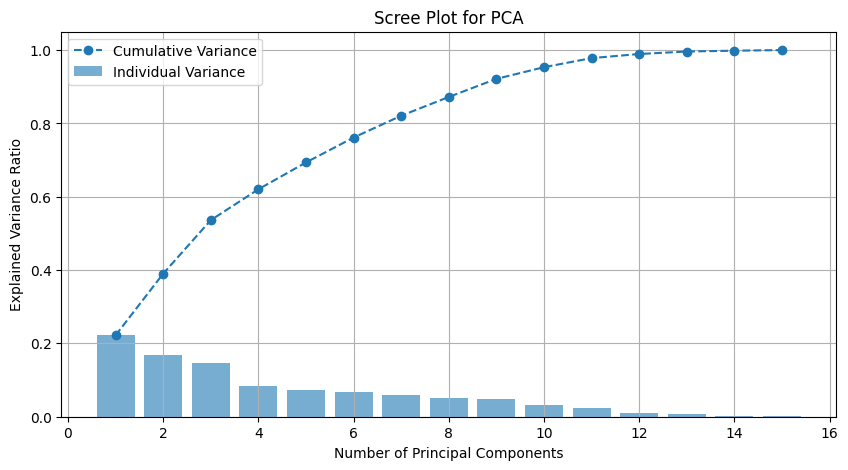

In [128]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label="Individual Variance")

plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot for PCA")
plt.legend()
plt.grid()
plt.show()

### Selecting the Optimal Number of Principal Components for 95% Variance Retention

In [129]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1  
print("The optimal number of Principal Components is:", num_components)

The optimal number of Principal Components is: 10


### Applying PCA for Dimensionality Reduction in Machine Learning

In [130]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

### Splitting PCA-Transformed Data for Model Training and Evaluation

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Displaying the Shapes of Training and Testing Datasets

In [132]:
print(f"The Shape Of X_train {X_train.shape}")
print(f"The Shape Of X_test {X_test.shape}")
print(f"The Shape Of y_train {y_train.shape}")
print(f"The Shape Of y_test {y_test.shape}")

The Shape Of X_train (11768, 10)
The Shape Of X_test (2943, 10)
The Shape Of y_train (11768,)
The Shape Of y_test (2943,)


### Comparison of Machine Learning Classifiers for Classification Tasks

In [133]:
Random_Forest = RandomForestClassifier(n_estimators=100, random_state=42)
Logistic_Regression = LogisticRegression(max_iter=1000)
SVM = SVC()
KNN = KNeighborsClassifier(n_neighbors=5)
Gradient_Boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

### Model Evaluation: Classification Report & Confusion Matrix

In [134]:
def models(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["Low Profit", "High Profit"])
    print(report)
    print("-"*54)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Profit", "High Profit"], yticklabels=["Low Profit", "High Profit"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Optimizing Predictions with Random Forest Classification

              precision    recall  f1-score   support

  Low Profit       0.94      0.90      0.92      1510
 High Profit       0.90      0.94      0.92      1433

    accuracy                           0.92      2943
   macro avg       0.92      0.92      0.92      2943
weighted avg       0.92      0.92      0.92      2943

------------------------------------------------------


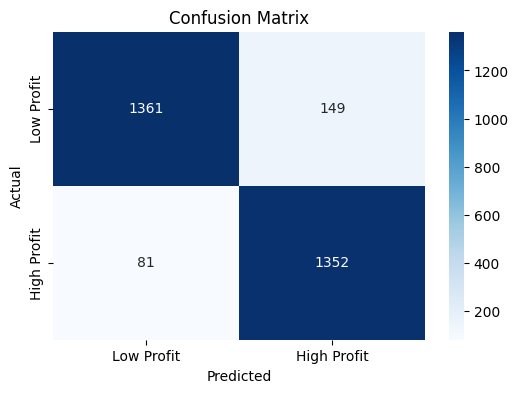

In [135]:
models(Random_Forest)

### Implementing Logistic Regression for Classification

              precision    recall  f1-score   support

  Low Profit       0.95      0.93      0.94      1510
 High Profit       0.93      0.95      0.94      1433

    accuracy                           0.94      2943
   macro avg       0.94      0.94      0.94      2943
weighted avg       0.94      0.94      0.94      2943

------------------------------------------------------


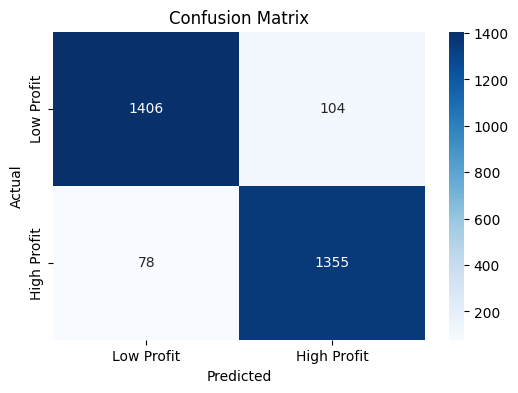

In [136]:
models(Logistic_Regression)

### Machine Learning with SVM: A Practical Implementation

              precision    recall  f1-score   support

  Low Profit       0.97      0.95      0.96      1510
 High Profit       0.95      0.97      0.96      1433

    accuracy                           0.96      2943
   macro avg       0.96      0.96      0.96      2943
weighted avg       0.96      0.96      0.96      2943

------------------------------------------------------


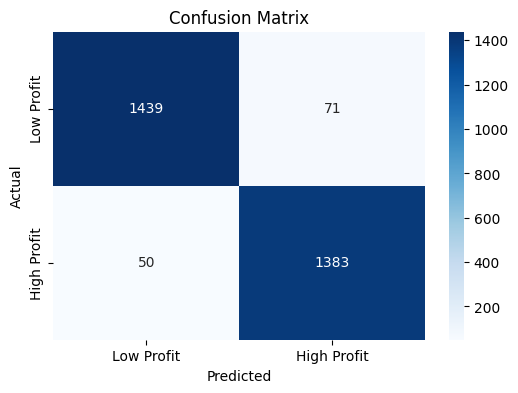

In [137]:
models(SVM)

### Implementing K-Nearest Neighbors (KNN) for Classification and Regression

              precision    recall  f1-score   support

  Low Profit       0.89      0.84      0.86      1510
 High Profit       0.84      0.89      0.86      1433

    accuracy                           0.86      2943
   macro avg       0.86      0.86      0.86      2943
weighted avg       0.86      0.86      0.86      2943

------------------------------------------------------


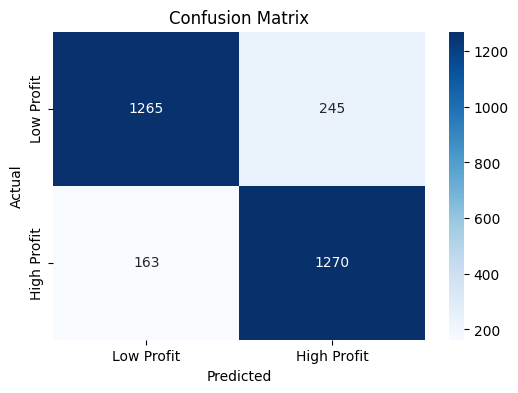

In [138]:
models(KNN)

### Implementing Gradient Boosting for Predictive Modeling

              precision    recall  f1-score   support

  Low Profit       0.96      0.89      0.93      1510
 High Profit       0.90      0.96      0.93      1433

    accuracy                           0.93      2943
   macro avg       0.93      0.93      0.93      2943
weighted avg       0.93      0.93      0.93      2943

------------------------------------------------------


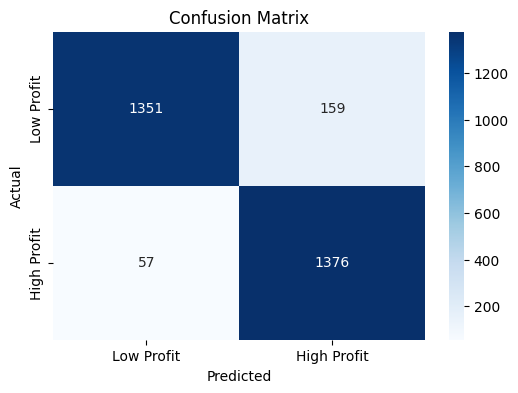

In [139]:
models(Gradient_Boosting)

### Performance Comparison of Machine Learning Models Based on Accuracy

                 Model  Accuracy
0                  SVM  0.958885
1  Logistic Regression  0.938158
2    Gradient Boosting  0.926606
3        Random Forest  0.921848
4                  KNN  0.861366


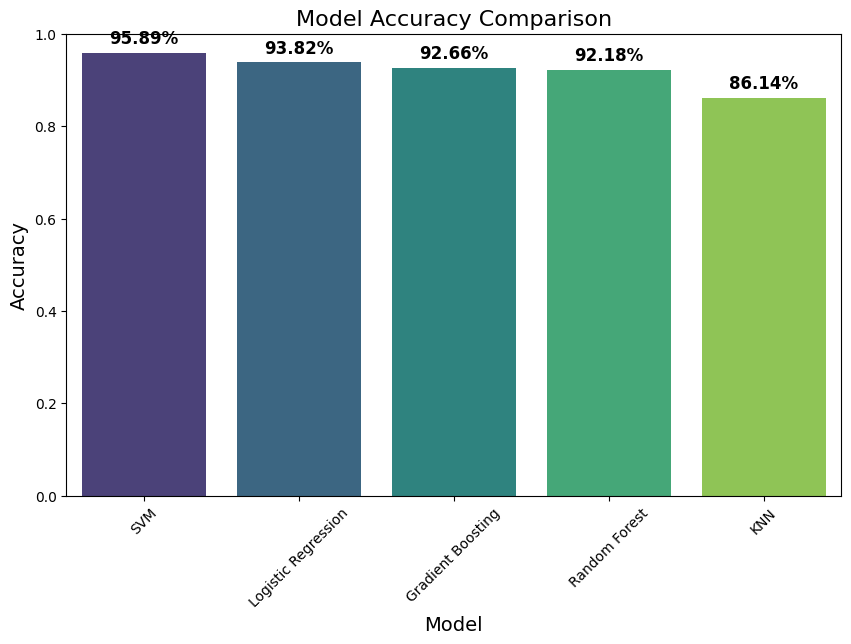

In [140]:
models = {
    'SVM': SVM,
    'Logistic Regression': Logistic_Regression,
    'Gradient Boosting': Gradient_Boosting,
    'Random Forest': Random_Forest,
    'KNN': KNN
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    results.append({'Model': name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0) 
plt.xticks(rotation=45) 
for index, row in results_df.iterrows():
    plt.text(row.name, row['Accuracy'] + 0.02, f"{row['Accuracy']:.2%}", 
             ha='center', fontsize=12, color='black', fontweight='bold')

plt.show()

###  Thank you everyone,I hope the notebook is useful for everyone